SEX

In [1]:
!pip install matplotlib seaborn pandas numpy --quiet

# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
file_name = '1_data_cleaning_preprocessing/2_cleaned_files/vaccine_hesitancy/VH_Sex.csv'
df = pd.read_csv(file_name)

In [ ]:
# Data Cleaning and Reshaping
# Converting columns to numeric
for col in df.columns[1:]:  # Skip the first column (Sex)
    # Checking if the column contains string data before applying str methods
    if df[col].dtype == object:  # object dtype often indicates strings
        df[col] = pd.to_numeric(df[col].str.replace(',', '').replace('-', np.nan), errors='coerce')
    else:
        # If not string, handle as numeric or other data type
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Creating a long-format dataset for positive sentiment
positive_sentiment_long = pd.melt(
    df,
    id_vars=['Sex'],
    value_vars=['Positive_Sentiment_JantoMarch2021', 'Positive_Sentiment_AprtoJuly2021'],
    var_name='Time_Period',
    value_name='Positive_Sentiment'
)
positive_sentiment_long['Time_Period'] = positive_sentiment_long['Time_Period'].str.replace(
    'Positive_Sentiment_', '').replace({
        'JantoMarch2021': 'Jan-Mar 2021',
        'AprtoJuly2021': 'Apr-Jul 2021'
    })

# Creating a long-format dataset for vaccine hesitancy
vaccine_hesitancy_long = pd.melt(
    df,
    id_vars=['Sex'],
    value_vars=['Vaccine_Hesitancy_JantoMarch2021', 'Vaccine_Hesitancy_AprtoJuly2021'],
    var_name='Time_Period',
    value_name='Vaccine_Hesitancy'
)
vaccine_hesitancy_long['Time_Period'] = vaccine_hesitancy_long['Time_Period'].str.replace(
    'Vaccine_Hesitancy_', '').replace({
        'JantoMarch2021': 'Jan-Mar 2021',
        'AprtoJuly2021': 'Apr-Jul 2021'
    })

# Combining both datasets for analysis
combined_long = pd.merge(
    positive_sentiment_long, vaccine_hesitancy_long,
    on=['Sex', 'Time_Period'], how='inner'
)

print("\nConsolidated Long Format Data:")
print(combined_long)



Consolidated Long Format Data:
      Sex   Time_Period  Positive_Sentiment  Vaccine_Hesitancy
0    Male  Jan-Mar 2021              7220.4              627.6
1  Female  Jan-Mar 2021              7920.6              581.4
2    Male  Apr-Jul 2021              7056.0              679.0
3  Female  Apr-Jul 2021              7544.0              321.0


In [ ]:
# Visualising Consolidated Data
# Setting up the seaborn theme for consistent styling
sns.set_theme(style="whitegrid")

# Function to add numerical labels on bars
def add_labels(ax):
    for bar in ax.patches:
        ax.annotate(
            format(bar.get_height(), '.2f'),  # Format the label to 2 decimal places
            (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Set position
            ha='center', va='center',  # Align horizontally and vertically
            size=10, xytext=(0, 5),  # Offset label slightly above the bar
            textcoords='offset points'
        )


<ipython-input-50-a56dc997f25d>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




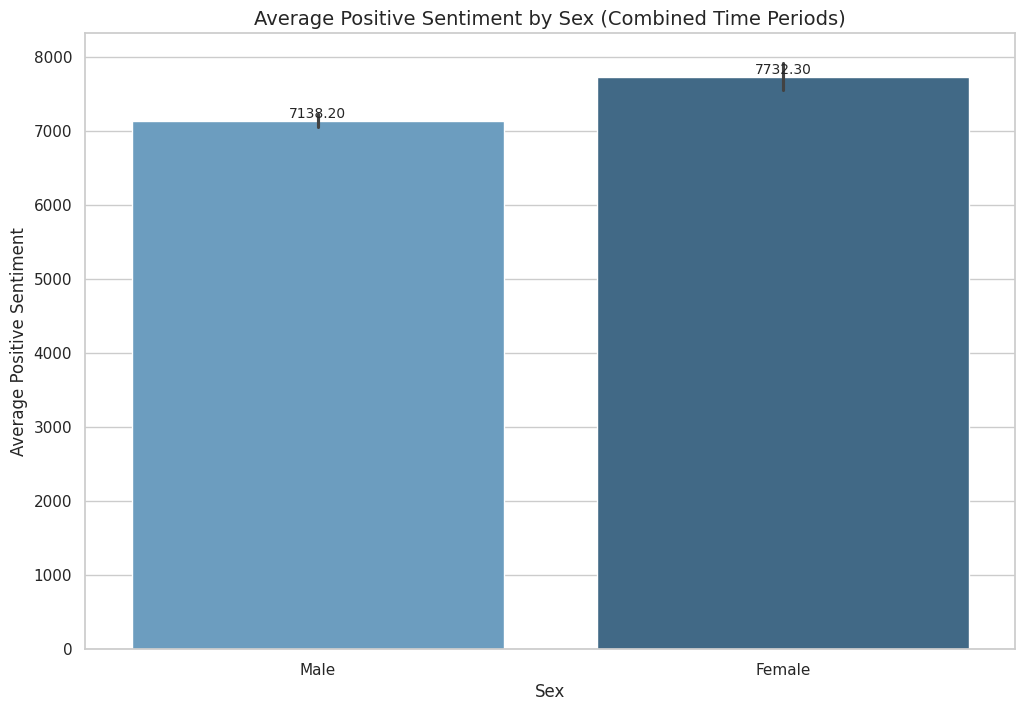

<ipython-input-50-a56dc997f25d>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




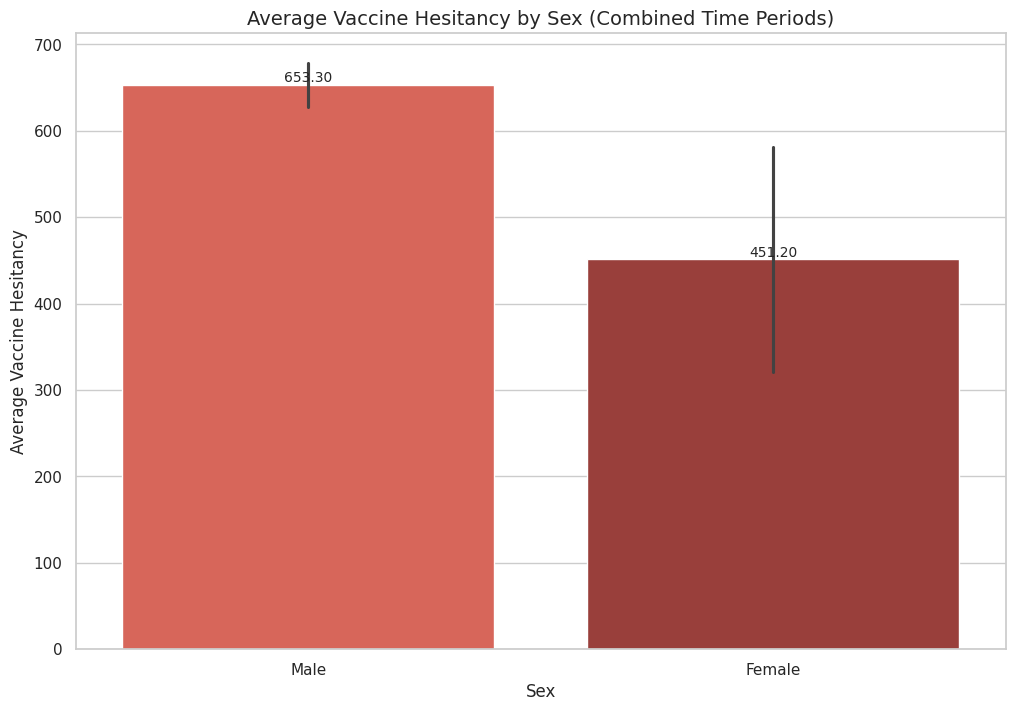

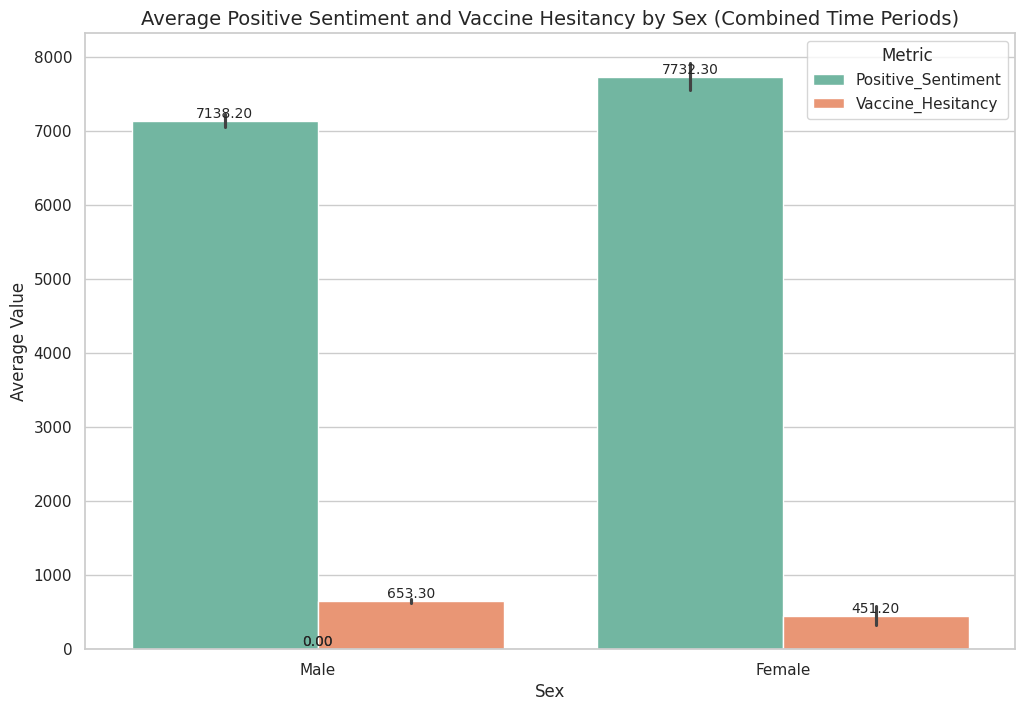

In [ ]:
# Visualisations for Combined Data

# Bar Plot: Average Positive Sentiment and Vaccine Hesitancy by Sex
plt.figure(figsize=(12, 8))
# Changed 'consolidated_data' to 'combined_long'
ax = sns.barplot(data=combined_long, x="Sex", y="Positive_Sentiment", palette="Blues_d")
add_labels(ax)  # Add numerical labels
plt.title("Average Positive Sentiment by Sex (Combined Time Periods)", fontsize=14)
plt.ylabel("Average Positive Sentiment")
plt.xlabel("Sex")
plt.show()

plt.figure(figsize=(12, 8))
# Changed 'consolidated_data' to 'combined_long'
ax = sns.barplot(data=combined_long, x="Sex", y="Vaccine_Hesitancy", palette="Reds_d")
add_labels(ax)  # Add numerical labels
plt.title("Average Vaccine Hesitancy by Sex (Combined Time Periods)", fontsize=14)
plt.ylabel("Average Vaccine Hesitancy")
plt.xlabel("Sex")
plt.show()

# Combined Bar Plot for Sentiment and Hesitancy
plt.figure(figsize=(12, 8))
# Changed 'consolidated_data' to 'combined_long'
consolidated_data_melted = pd.melt(
    combined_long,
    id_vars=["Sex"],
    value_vars=["Positive_Sentiment", "Vaccine_Hesitancy"],
    var_name="Metric",
    value_name="Value"
)
ax = sns.barplot(data=consolidated_data_melted, x="Sex", y="Value", hue="Metric", palette="Set2")
add_labels(ax)  # Add numerical labels
plt.title("Average Positive Sentiment and Vaccine Hesitancy by Sex (Combined Time Periods)", fontsize=14)
plt.ylabel("Average Value")
plt.xlabel("Sex")
plt.legend(title="Metric")
plt.show()

<ipython-input-78-de233a5b4dd8>:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




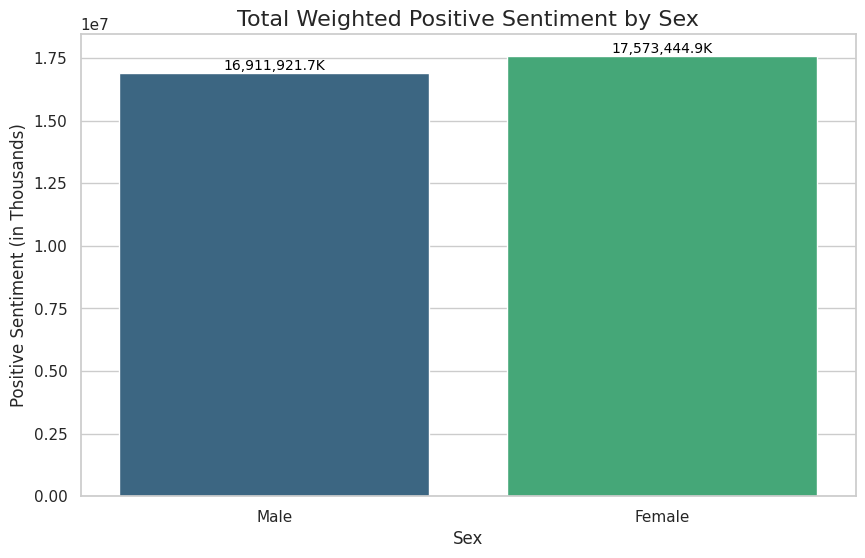

<ipython-input-78-de233a5b4dd8>:44: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




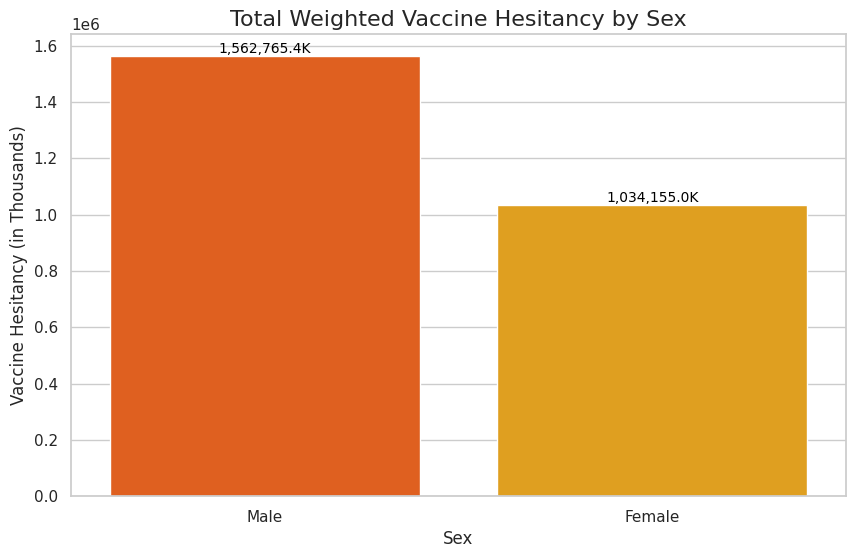

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the DataFrame with provided weighted values
data = {
    "Sex": ["Male", "Female"],
    "Positive_Sentiment_JantoMarch2021_Weighted": [8048806.72, 8524086.88],
    "Positive_Sentiment_AprtoJuly2021_Weighted": [8863115, 9049358],
    "Vaccine_Hesitancy_JantoMarch2021_Weighted": [708926.40, 626993.99],
    "Vaccine_Hesitancy_AprtoJuly2021_Weighted": [853839, 407161]
}
df = pd.DataFrame(data)

# Aggregating weighted values for each metric across time periods
df["Positive_Sentiment_Weighted_Total"] = (
    df["Positive_Sentiment_JantoMarch2021_Weighted"] + df["Positive_Sentiment_AprtoJuly2021_Weighted"]
)
df["Vaccine_Hesitancy_Weighted_Total"] = (
    df["Vaccine_Hesitancy_JantoMarch2021_Weighted"] + df["Vaccine_Hesitancy_AprtoJuly2021_Weighted"]
)

# Visualising Positive Sentiment
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df,
    x="Sex",
    y="Positive_Sentiment_Weighted_Total",
    palette="viridis"
)
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():,.1f}K",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Total Weighted Positive Sentiment by Sex", fontsize=16)
plt.ylabel("Positive Sentiment (in Thousands)")
plt.xlabel("Sex")
plt.show()

# Visualising Vaccine Hesitancy
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df,
    x="Sex",
    y="Vaccine_Hesitancy_Weighted_Total",
    palette="autumn"
)
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():,.1f}K",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Total Weighted Vaccine Hesitancy by Sex", fontsize=16)
plt.ylabel("Vaccine Hesitancy (in Thousands)")
plt.xlabel("Sex")
plt.show()








Observations and Insights

Gender-Based Positive Sentiment:
    Females exhibit a higher total positive sentiment compared to males (both in Jan-Mar 2021 and Apr-Jul 2021).
    This trend suggests that females may have had a generally more positive outlook toward vaccination during this timeframe.

Gender-Based Vaccine Hesitancy:

Males show significantly higher vaccine hesitancy than females across the combined timeframe.
This pattern might indicate differences in attitudes, access, or exposure to vaccine-related information.

Proportional Analysis:

 We can calculate the proportion of vaccine hesitancy to positive sentiment for both genders:
 Proportion=Vaccine Hesitancy Weighted TotalPositive Sentiment Weighted Total
 Proportion=Positive Sentiment Weighted TotalVaccine Hesitancy Weighted Total​ This could help determine the level of resistance relative to support for vaccinations.   
    

    

In [ ]:
# Calculating Proportion and Ratio
df['Hesitancy_to_Sentiment_Proportion'] = df['Vaccine_Hesitancy_Weighted_Total'] / df['Positive_Sentiment_Weighted_Total']
df['Sentiment_to_Hesitancy_Ratio'] = df['Positive_Sentiment_Weighted_Total'] / df['Vaccine_Hesitancy_Weighted_Total']

print("\nCalculated Proportions and Ratios:")
print(df[['Sex', 'Hesitancy_to_Sentiment_Proportion', 'Sentiment_to_Hesitancy_Ratio']])



Calculated Proportions and Ratios:
      Sex  Hesitancy_to_Sentiment_Proportion  Sentiment_to_Hesitancy_Ratio
0    Male                           0.092406                     10.821792
1  Female                           0.058848                     16.993048


INCOME BANDS

<ipython-input-53-6054a461aba7>:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




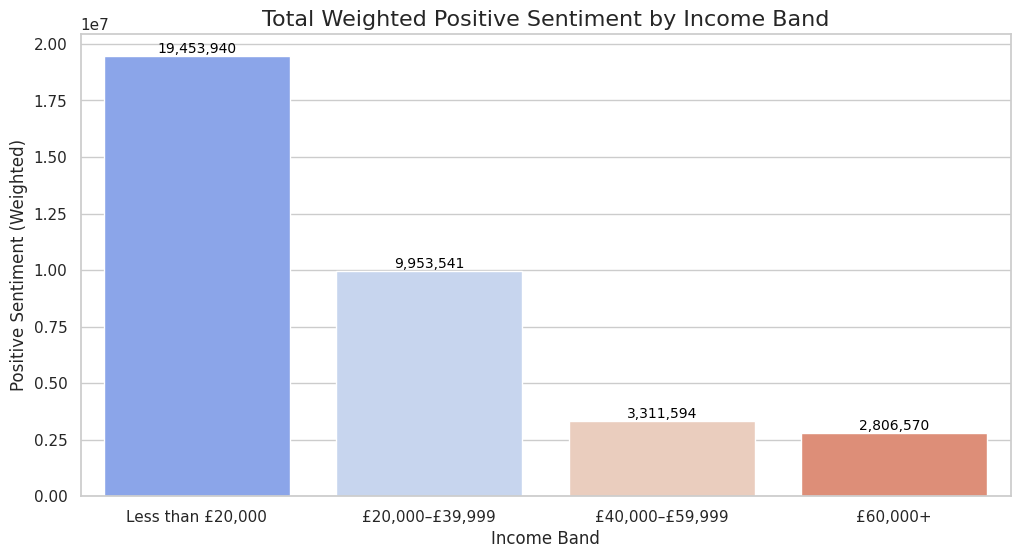

<ipython-input-53-6054a461aba7>:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




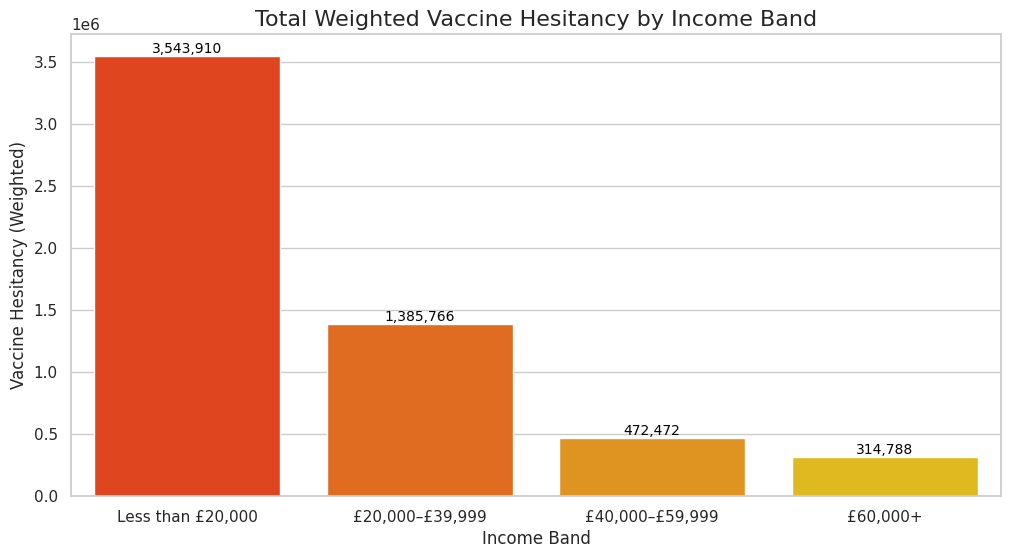

In [ ]:
# Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the DataFrame
data = {
    "Income Band": ["Less than £20,000", "£20,000–£39,999", "£40,000–£59,999", "£60,000+"],
    "Positive_Weighted_JantoMarch2021": [14975822, 1975091, 490018, 172241],
    "Hesitancy_Weighted_JantoMarch2021": [2623252, 219455, 42611, 9065],
    "Positive_Weighted_AprtoJuly2021": [4478118, 7978450, 2821576, 2634329],
    "Hesitancy_Weighted_AprtoJuly2021": [920658, 1166311, 429861, 305723]
}
df = pd.DataFrame(data)

# Aggregating weighted values into one timeframe
df["Positive_Weighted_Total"] = (
    df["Positive_Weighted_JantoMarch2021"] + df["Positive_Weighted_AprtoJuly2021"]
)
df["Hesitancy_Weighted_Total"] = (
    df["Hesitancy_Weighted_JantoMarch2021"] + df["Hesitancy_Weighted_AprtoJuly2021"]
)

# Step 4: Calculate Proportions and Ratios
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Hesitancy_Weighted_Total"] / df["Positive_Weighted_Total"]
)
df["Sentiment_to_Hesitancy_Ratio"] = (
    df["Positive_Weighted_Total"] / df["Hesitancy_Weighted_Total"]
)

# Visualising Positive Sentiment by Income Band
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Income Band", y="Positive_Weighted_Total", palette="coolwarm")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():,.0f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Total Weighted Positive Sentiment by Income Band", fontsize=16)
plt.ylabel("Positive Sentiment (Weighted)")
plt.xlabel("Income Band")
plt.show()

# Visualising Vaccine Hesitancy by Income Band
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Income Band", y="Hesitancy_Weighted_Total", palette="autumn")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():,.0f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Total Weighted Vaccine Hesitancy by Income Band", fontsize=16)
plt.ylabel("Vaccine Hesitancy (Weighted)")
plt.xlabel("Income Band")
plt.show()

<ipython-input-54-10e15d4136ba>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




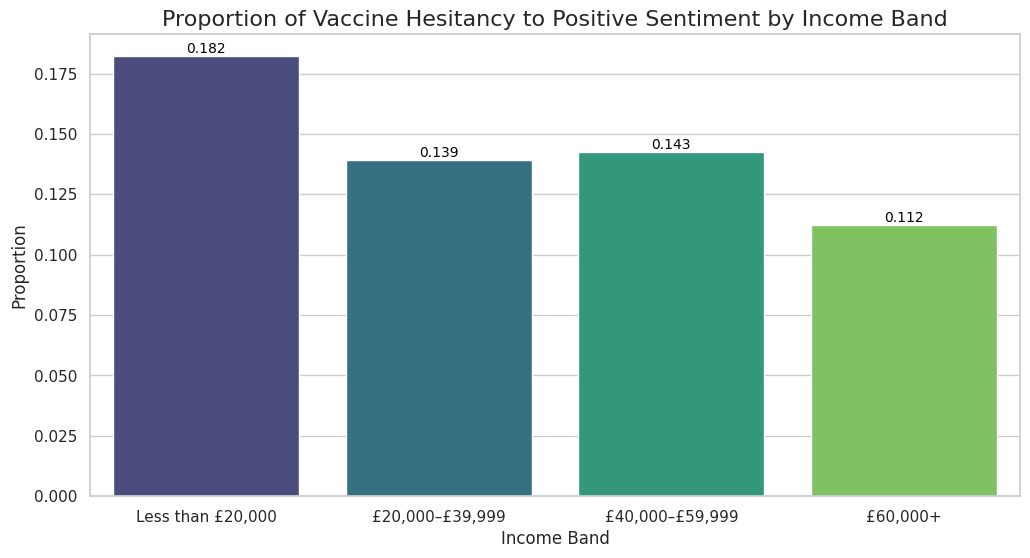

In [ ]:
# Visualising Proportions
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Income Band", y="Hesitancy_to_Sentiment_Proportion", palette="viridis")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.3f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Proportion of Vaccine Hesitancy to Positive Sentiment by Income Band", fontsize=16)
plt.ylabel("Proportion")
plt.xlabel("Income Band")
plt.show()

Observations:

    Highest Proportion in Low-Income Group:
        The "Less than £20,000" income band has the highest proportion (0.182) of vaccine hesitancy compared to positive sentiment.
        This suggests that individuals in this income group are significantly more likely to express hesitancy relative to their positive sentiment compared to other income bands.

    Proportion Decreases with Income:
        As income increases, the hesitancy-to-sentiment proportion decreases:
            £20,000–£39,999: 0.139
            £40,000–£59,999: 0.143
            £60,000+: 0.112
        This trend indicates that higher-income groups are less hesitant relative to their level of positive sentiment.

    Lowest Proportion in Highest Income Group:
        The "£60,000+" group has the lowest proportion (0.112), showing the least hesitancy relative to their positive sentiment.
        This suggests that wealthier individuals are generally more confident or less resistant to vaccination.

        ~~ Possible Explanations:

    Access to Information:
        Higher-income groups might have better access to accurate vaccine-related information, reducing hesitancy.

    Trust in Healthcare:
        Wealthier individuals may have more trust in healthcare systems and vaccines due to better healthcare experiences.

    Impact of Socioeconomic Challenges:
        Lower-income groups may face more barriers (e.g., logistical challenges, mistrust, misinformation) that influence vaccine hesitancy.

In [ ]:
# Correlation Analysis
correlation = df[["Positive_Weighted_Total", "Hesitancy_Weighted_Total"]].corr()
print("\nCorrelation Between Positive Sentiment and Vaccine Hesitancy:")
print(correlation)


Correlation Between Positive Sentiment and Vaccine Hesitancy:
                          Positive_Weighted_Total  Hesitancy_Weighted_Total
Positive_Weighted_Total                  1.000000                  0.993632
Hesitancy_Weighted_Total                 0.993632                  1.000000


<ipython-input-56-fafc4bee6a6a>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




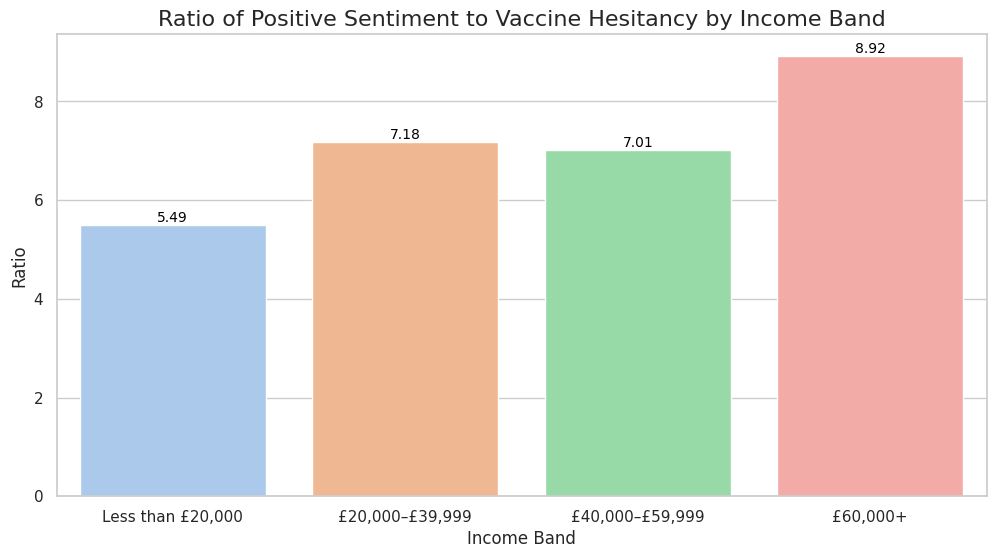

In [ ]:
# Ratio of Sentiment to Vaccine Hesitancy

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Income Band", y="Sentiment_to_Hesitancy_Ratio", palette="pastel")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.2f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Ratio of Positive Sentiment to Vaccine Hesitancy by Income Band", fontsize=16)
plt.ylabel("Ratio")
plt.xlabel("Income Band")
plt.show()

    Higher Ratios in Higher Income Bands:
        The ratio increases as income increases, indicating that higher-income groups have more positive sentiment relative to vaccine hesitancy:
            Less than £20,000: 5.49
            £20,000–£39,999: 7.18
            £40,000–£59,999: 7.01
            £60,000+: 8.92
        The highest ratio in the £60,000+ group suggests that for every hesitant individual, there are nearly 9 positively inclined individuals.

    Lowest Ratio in Lowest Income Band:
        The "Less than £20,000" group has the lowest ratio (5.49), indicating relatively lower positive sentiment compared to hesitancy in this group.
        This aligns with the higher proportional hesitancy observed in the lower-income group.

    Income Band Consistency:
        The middle-income bands (£20,000–£39,999 and £40,000–£59,999) have similar ratios, around 7, showing a slight plateau before the jump in the highest income band.

Insights:

    Economic Influence on Vaccine Attitudes:
        The increasing ratio with higher income bands reinforces the idea that higher-income groups are more likely to have positive sentiment toward vaccines and less likely to exhibit hesitancy.
        Economic security may play a role in fostering confidence in healthcare and vaccines.

    Public Health Targeting:
        The "Less than £20,000" income band requires targeted public health interventions to address vaccine hesitancy.
        Campaigns focusing on reducing barriers to vaccine access, improving trust, and countering misinformation might be most effective for this group.

    Strong Positive Sentiment in Wealthy Groups:
        The £60,000+ group demonstrates the strongest positive sentiment, which could be leveraged to promote advocacy or support vaccination drives.

EMPLOYMENT STATUS

<ipython-input-57-877ac298f895>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




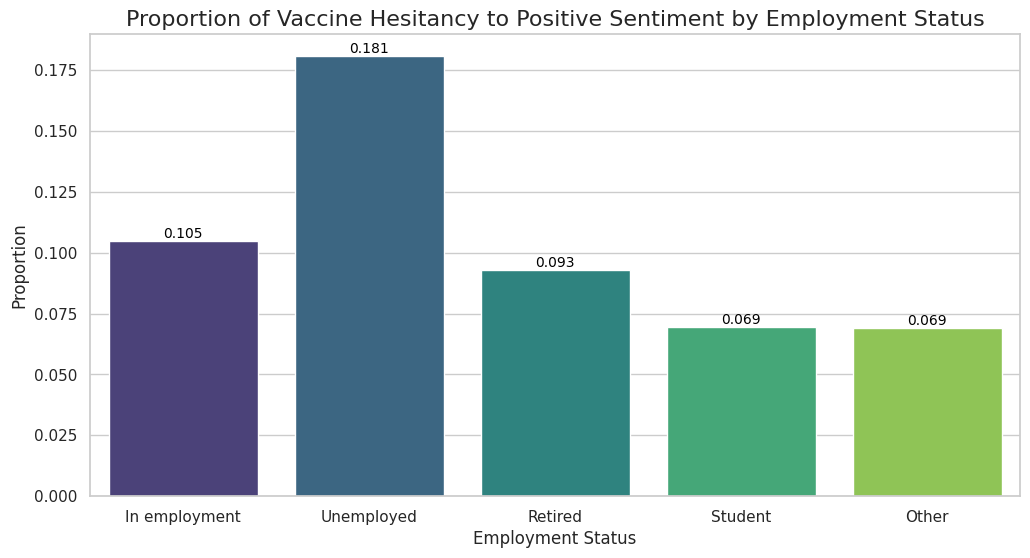

<ipython-input-57-877ac298f895>:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




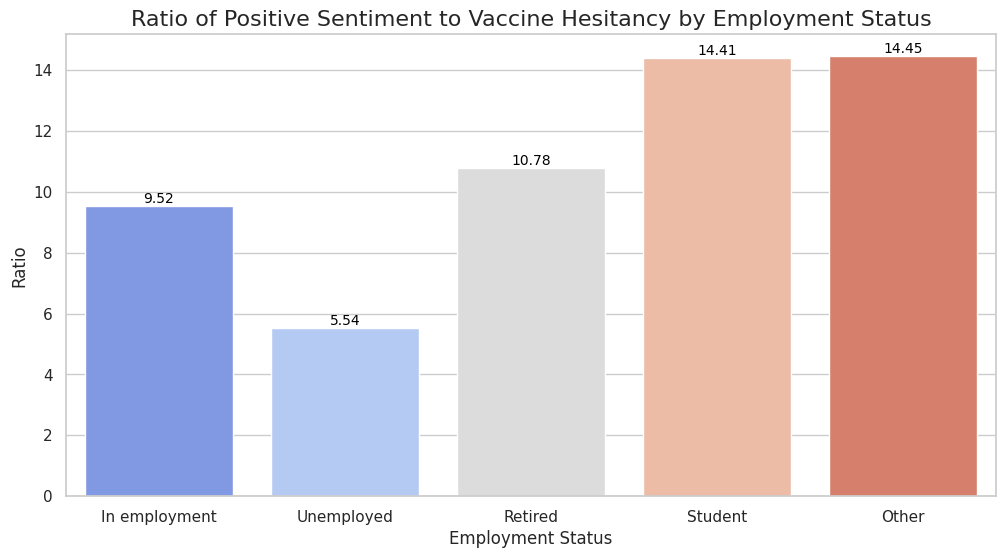

In [ ]:
# Creating the DataFrame
data = {
    "Employment Status": ["In employment", "Unemployed", "Retired", "Student", "Other"],
    "Positive Vaccine Sentiment Weighted": [19281305, 8941753, 2958437, 1209428, 1134510],
    "Vaccine Hesitancy Weighted": [2024496, 1615348, 274502, 83942, 78516]
}
df = pd.DataFrame(data)

# Calculating Proportions and Ratios
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Vaccine Hesitancy Weighted"] / df["Positive Vaccine Sentiment Weighted"]
)
df["Sentiment_to_Hesitancy_Ratio"] = (
    df["Positive Vaccine Sentiment Weighted"] / df["Vaccine Hesitancy Weighted"]
)

# Visualising Proportions
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Employment Status", y="Hesitancy_to_Sentiment_Proportion", palette="viridis")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.3f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Proportion of Vaccine Hesitancy to Positive Sentiment by Employment Status", fontsize=16)
plt.ylabel("Proportion")
plt.xlabel("Employment Status")
plt.show()

# Visualising Ratios
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Employment Status", y="Sentiment_to_Hesitancy_Ratio", palette="coolwarm")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.2f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Ratio of Positive Sentiment to Vaccine Hesitancy by Employment Status", fontsize=16)
plt.ylabel("Ratio")
plt.xlabel("Employment Status")
plt.show()


Observations Based on Analysis:

    Highest Proportion of Hesitancy:
        Unemployed individuals have the highest hesitancy-to-sentiment proportion.
        Proportion reflects barriers such as access to information, trust in healthcare, or structural challenges faced by unemployed individuals.

    Lowest Hesitancy-to-Sentiment Proportion:
        Students and Other groups exhibit the lowest proportion of vaccine hesitancy to positive sentiment, possibly indicating younger age or more openness to vaccination.

    Strongest Positive Sentiment:
        In employment group exhibits the highest ratio of positive sentiment to hesitancy, showing the greatest confidence or least resistance toward vaccination.

    Vulnerable Groups:
        Unemployed and Retired groups might require targeted interventions to address hesitancy, given their relatively higher proportions.

        Key Takeaways:

    Employment Status Matters:
        Employment status significantly affects attitudes toward vaccines.
        Unemployed individuals exhibit relatively higher hesitancy, requiring focused public health outreach.

    Students and Young Adults:
        Students show the lowest hesitancy proportion and may act as advocates for vaccine campaigns targeting their peers or families.

    Retired Individuals:
        While hesitancy is not the highest, retired individuals might benefit from tailored messaging and healthcare accessibility improvements.

MENTAL HEALTH

<ipython-input-58-d29a1e7c58fb>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




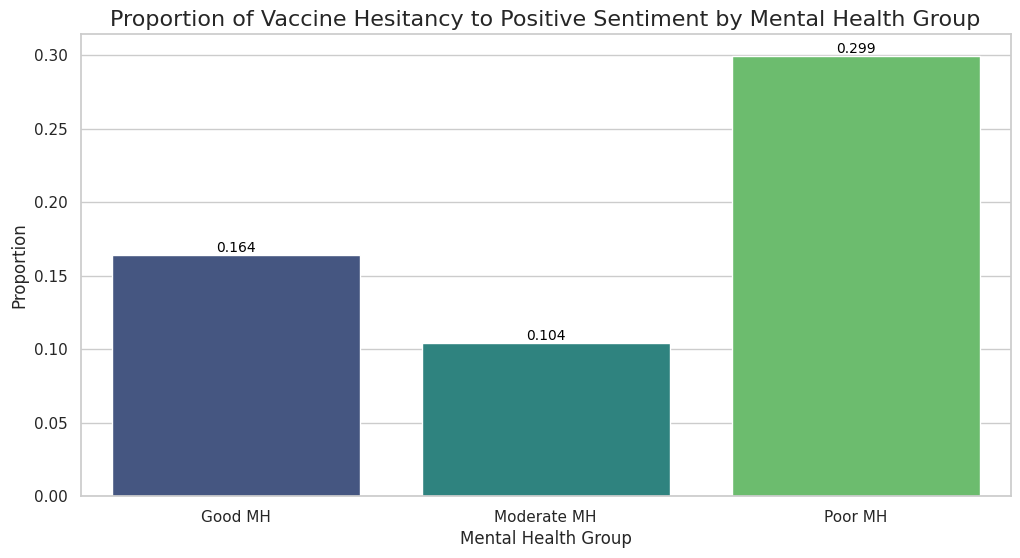

<ipython-input-58-d29a1e7c58fb>:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




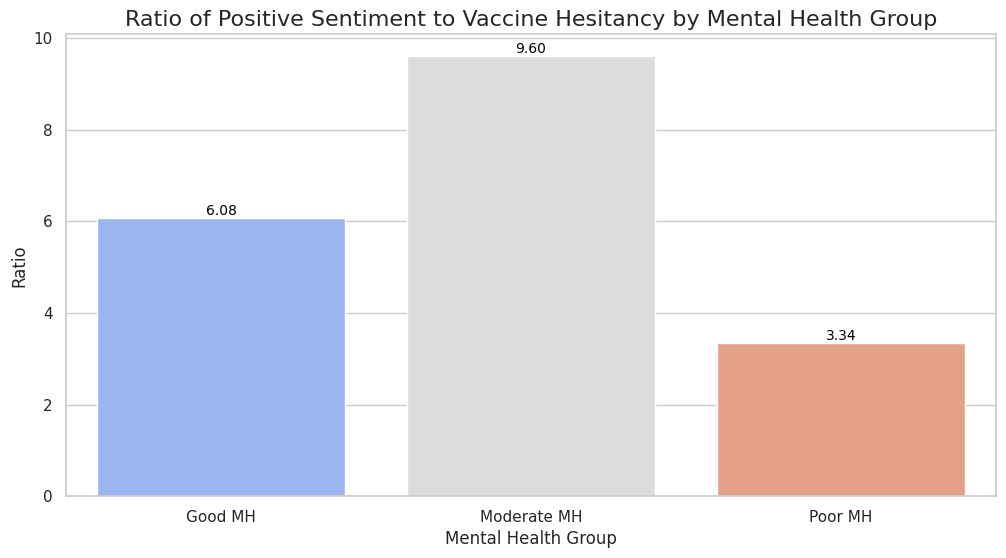

In [ ]:
# Creating the DataFrame
data = {
    "MH Group": ["Good MH", "Moderate MH", "Poor MH"],
    "Positive Sentiment Weighted": [11109348, 5269198, 1243913],
    "Hesitant Weighted": [1827065, 548737, 372353]
}
df = pd.DataFrame(data)

# Calculating Proportions and Ratios
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Hesitant Weighted"] / df["Positive Sentiment Weighted"]
)
df["Sentiment_to_Hesitancy_Ratio"] = (
    df["Positive Sentiment Weighted"] / df["Hesitant Weighted"]
)

# Visualising Proportions
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="MH Group", y="Hesitancy_to_Sentiment_Proportion", palette="viridis")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.3f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Proportion of Vaccine Hesitancy to Positive Sentiment by Mental Health Group", fontsize=16)
plt.ylabel("Proportion")
plt.xlabel("Mental Health Group")
plt.show()

# Visualising Ratios
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="MH Group", y="Sentiment_to_Hesitancy_Ratio", palette="coolwarm")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.2f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Ratio of Positive Sentiment to Vaccine Hesitancy by Mental Health Group", fontsize=16)
plt.ylabel("Ratio")
plt.xlabel("Mental Health Group")
plt.show()


HESITANCY TO SENTIMENT
This chart visualises the proportion of vaccine hesitancy to positive sentiment by mental health group, providing further insights into how mental health influences vaccine attitudes.
Observations:

    Poor MH Group (Highest Proportion):
        The Poor MH group has the highest proportion at 0.299. This means that for every individual with positive sentiment, nearly 30% of people are hesitant.
        This highlights significant vaccine hesitancy in this group relative to their positive sentiment, indicating barriers such as fear, mistrust, or limited access to information.

    Moderate MH Group (Lowest Proportion):
        The Moderate MH group has the lowest proportion at 0.104. This suggests that only about 10% of individuals with positive sentiment are hesitant, indicating relatively strong confidence in vaccines within this group.

    Good MH Group:
        The Good MH group’s proportion is 0.164, which falls between the Moderate and Poor MH groups.
        While better than Poor MH, it still shows higher hesitancy relative to Moderate MH, suggesting that mental health status directly impacts attitudes even for those in the "Good MH" category.

Implications:

    Mental Health and Vaccine Hesitancy:
        The higher proportion for Poor MH demonstrates that vaccine hesitancy is much more pronounced in this group relative to their positive sentiment.
        Mental health challenges may exacerbate anxieties, mistrust, or barriers to accessing vaccines.

    Moderate MH Group's Resilience:
        The lowest proportion in the Moderate MH group is notable. This group may have benefited from active engagement with healthcare systems or balanced attitudes, leading to stronger vaccine confidence.

    Targeted Interventions:
        The Poor MH group requires targeted interventions, such as:
            Mental health support services integrated with vaccine campaigns.
            Tailored messaging to address fears and mistrust.
            Increased access to resources for vaccine-related education.

Comparison to the Ratio Chart:

    While the ratio chart shows strong sentiment-to-hesitancy ratios for Moderate and Good MH groups, this proportion chart highlights the relative burden of hesitancy in the Poor MH group, which needs specific attention.

Key Takeaway:

The Poor MH group exhibits the highest relative vaccine hesitancy, while the Moderate MH group demonstrates the lowest hesitancy proportion. This reinforces the need to address mental health as a key factor in public health vaccination campaigns.

RATIO SENTIMENT TO HESTITANCY
Observations:

    Moderate MH Group (Highest Ratio):
        This group has the highest ratio (9.60), meaning for every hesitant individual, there are nearly 10 individuals with positive sentiment.
        Suggests a high level of vaccine confidence relative to hesitancy.

    Good MH Group:
        The ratio is 6.08, which is lower than the Moderate MH group but still indicates that positive sentiment significantly outweighs hesitancy.
        Individuals with good mental health are generally confident in vaccines but not as strongly as the Moderate MH group.

    Poor MH Group (Lowest Ratio):
        This group has the lowest ratio (3.34), indicating that for every hesitant individual, there are only about 3 with positive sentiment.
        Reflects a weaker confidence in vaccines and higher levels of hesitancy relative to the other groups.

DISABILITY STATUS

<ipython-input-59-3c523bcd27ea>:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




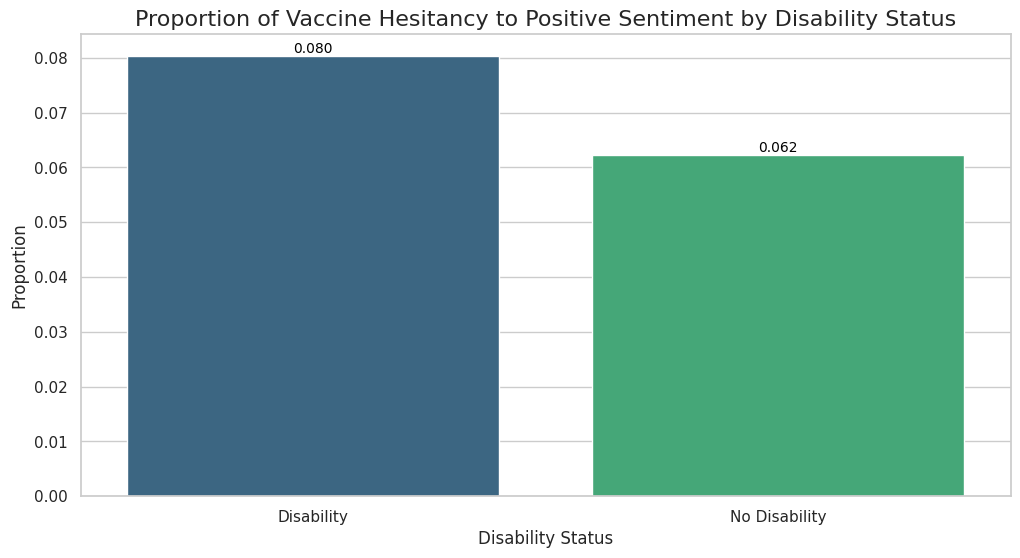

<ipython-input-59-3c523bcd27ea>:43: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




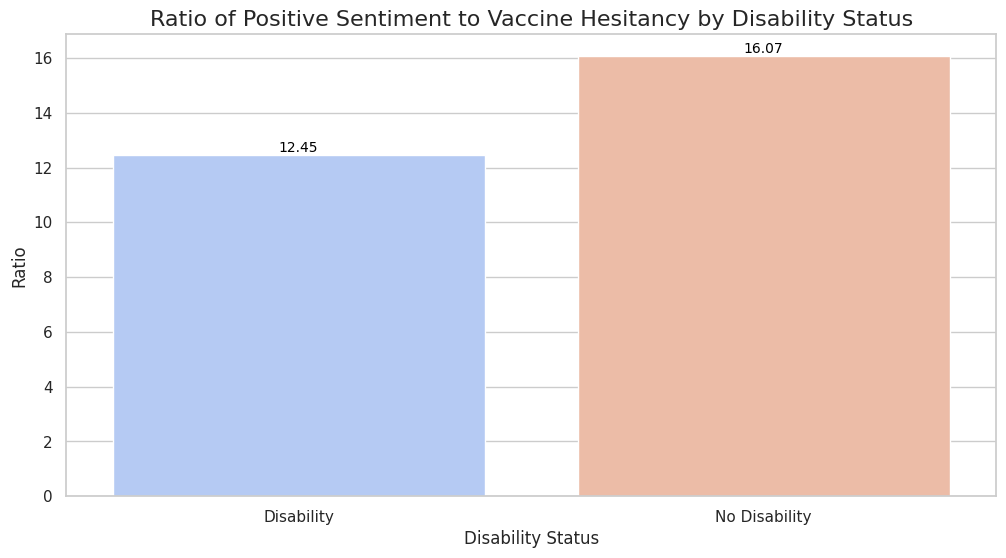

In [ ]:
# Creating the DataFrame
data = {
    "Disability Status": ["Disability", "No Disability"],
    "Weighted_Positive_JantoMar2021": [6704124, 9604482],
    "Weighted_Hesitant_JantoMar2021": [555162, 729846],
    "Weighted_Positive_AprtoJuly2021": [3329584, 13594906],
    "Weighted_Hesitant_AprtoJuly2021": [250569, 714207]
}
df = pd.DataFrame(data)

# Aggregating weighted values into one timeframe
df["Weighted_Positive_Total"] = (
    df["Weighted_Positive_JantoMar2021"] + df["Weighted_Positive_AprtoJuly2021"]
)
df["Weighted_Hesitant_Total"] = (
    df["Weighted_Hesitant_JantoMar2021"] + df["Weighted_Hesitant_AprtoJuly2021"]
)

# Calculating Proportions and Ratios
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Weighted_Hesitant_Total"] / df["Weighted_Positive_Total"]
)
df["Sentiment_to_Hesitancy_Ratio"] = (
    df["Weighted_Positive_Total"] / df["Weighted_Hesitant_Total"]
)

# Visualising Proportions
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Disability Status", y="Hesitancy_to_Sentiment_Proportion", palette="viridis")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.3f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Proportion of Vaccine Hesitancy to Positive Sentiment by Disability Status", fontsize=16)
plt.ylabel("Proportion")
plt.xlabel("Disability Status")
plt.show()

# Visualise Ratios
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Disability Status", y="Sentiment_to_Hesitancy_Ratio", palette="coolwarm")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.2f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Ratio of Positive Sentiment to Vaccine Hesitancy by Disability Status", fontsize=16)
plt.ylabel("Ratio")
plt.xlabel("Disability Status")
plt.show()


HESITANCY TO SENTIMENT

This chart, showing the proportion of vaccine hesitancy to positive sentiment by disability status, provides important insights into how disability influences vaccine attitudes.
Observations:

    Higher Proportion for Individuals with Disabilities:
        The Disability group has a proportion of 0.080, meaning for every individual with positive vaccine sentiment, approximately 8% are hesitant.
        This is higher than the No Disability group (0.062), indicating that individuals with disabilities are relatively more hesitant about vaccines compared to their level of positive sentiment.

    Lower Proportion for Individuals Without Disabilities:
        The No Disability group has a proportion of 0.062, meaning only about 6.2% of those with positive sentiment are hesitant.
        This shows greater confidence in vaccines among individuals without disabilities.

Implications:

    Disability as a Risk Factor for Hesitancy:
        The higher proportion for the Disability group suggests that this population may face specific barriers, such as:
            Accessibility issues (e.g., reaching vaccination sites or understanding health information).
            Health-related concerns about vaccine safety due to pre-existing conditions.
            Distrust in healthcare systems, which could amplify hesitancy.

    Public Health Focus:
        Public health campaigns should consider targeted messaging and resources for individuals with disabilities, focusing on:
            Inclusive communication: Providing information in accessible formats.
            Reassurance about safety: Addressing concerns specific to pre-existing conditions.
            Reducing logistical barriers: Ensuring easy access to vaccines for individuals with mobility or sensory challenges.

    Room for Improvement in Both Groups:
        While the No Disability group exhibits a lower proportion, there is still a notable level of hesitancy relative to sentiment (6.2%), suggesting that vaccine confidence can be further bolstered across the board.

SENTIMENT TO HESITANCY

This chart illustrates the ratio of positive sentiment to vaccine hesitancy by disability status, providing a complementary perspective to the proportion chart.
Observations:

    Lower Ratio for Disability Group:
        The ratio for individuals with disabilities is 12.45, meaning for every hesitant individual, there are roughly 12 people with positive sentiment.
        This lower ratio reflects a weaker dominance of positive sentiment relative to hesitancy in this group.

    Higher Ratio for No Disability Group:
        The ratio for individuals without disabilities is 16.07, meaning for every hesitant individual, there are about 16 people with positive sentiment.
        This higher ratio indicates that individuals without disabilities exhibit significantly stronger confidence in vaccines relative to hesitancy.

Comparison with the Proportion Chart:

    While the proportion chart highlights that the Disability group has a higher relative hesitancy, the ratio chart shows that this group has weaker positive sentiment dominance compared to the No Disability group.
    Together, the charts demonstrate that individuals with disabilities face higher vaccine hesitancy and relatively lower positive sentiment.

Implications:

    Challenges for the Disability Group:
        The lower ratio indicates that vaccine hesitancy is a notable concern among individuals with disabilities, requiring targeted public health efforts.
        Potential barriers:
            Health Concerns: Fears about how vaccines might interact with disabilities or pre-existing conditions.
            Accessibility Issues: Difficulty in accessing vaccination sites or understanding vaccine information.
            Trust Deficit: Reduced trust in healthcare systems due to past negative experiences.

    Opportunities to Improve Confidence:
        For the Disability group, interventions can focus on:
            Tailored Messaging: Addressing specific concerns about safety for individuals with disabilities.
            Improved Accessibility: Ensuring vaccines are easy to access and information is available in diverse formats.
            Community Engagement: Involving disability advocacy groups to build trust and support.

    Strength in the No Disability Group:
        The No Disability group’s higher ratio (16.07) reflects stronger confidence and lower hesitancy. Public health efforts here might focus on maintaining this trend while addressing remaining hesitancy.

Key Takeaways:

    Individuals with disabilities are more hesitant relative to their positive sentiment compared to those without disabilities.
    Public health strategies must address the specific needs and barriers of the Disability group to improve vaccine confidence and reduce hesitancy.

HOMEOWNER STATUS

<ipython-input-60-3350efac73ff>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




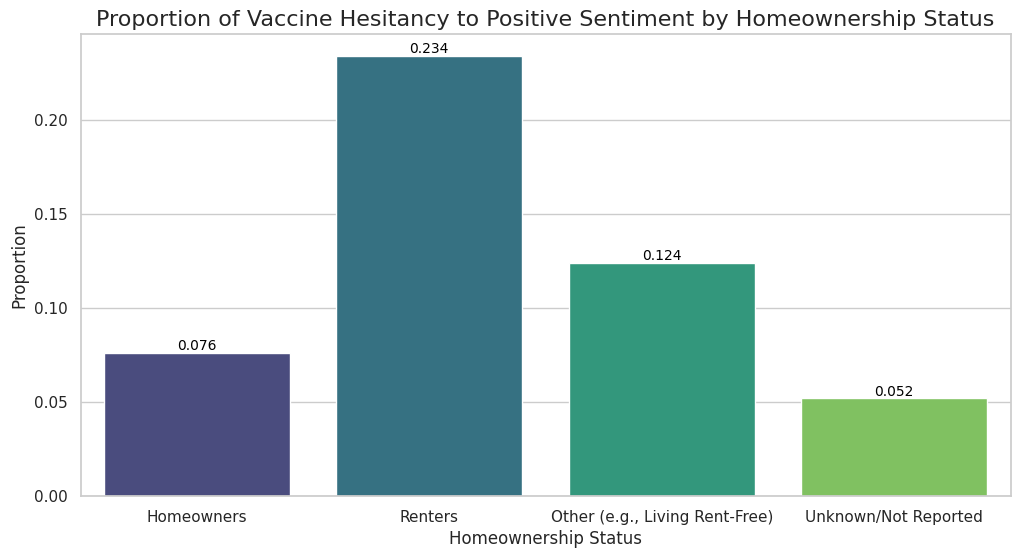

<ipython-input-60-3350efac73ff>:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




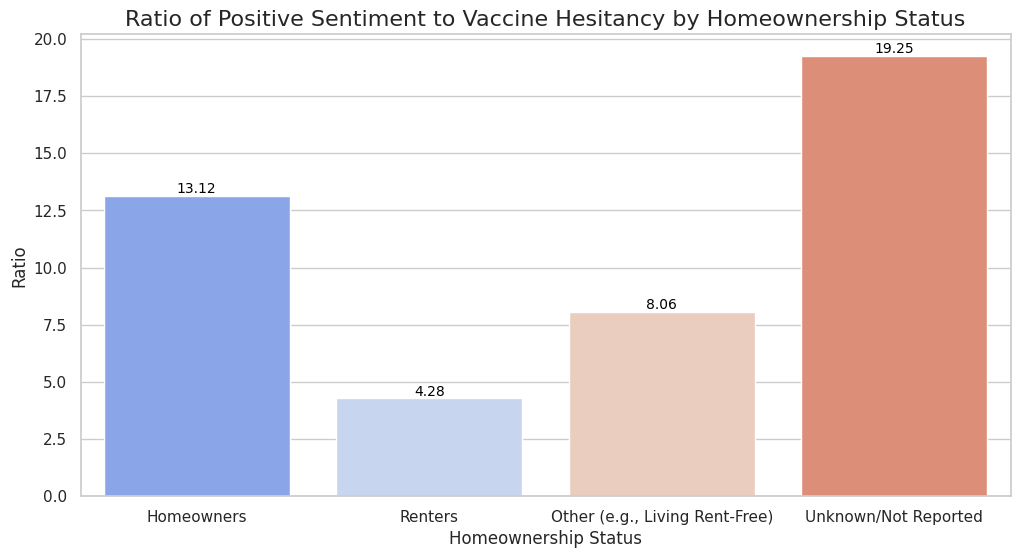

In [ ]:
# Creating the DataFrame
data = {
    "Homeownership Status": ["Homeowners", "Renters", "Other (e.g., Living Rent-Free)", "Unknown/Not Reported"],
    "Positive Vaccine Sentiment (Weighted)": [23146352, 8556219, 1290000, 1020000],
    "Vaccine Hesitancy (Weighted)": [1764745, 2000987, 160000, 53000]
}
df = pd.DataFrame(data)

# Calculating Proportions and Ratios
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Vaccine Hesitancy (Weighted)"] / df["Positive Vaccine Sentiment (Weighted)"]
)
df["Sentiment_to_Hesitancy_Ratio"] = (
    df["Positive Vaccine Sentiment (Weighted)"] / df["Vaccine Hesitancy (Weighted)"]
)

# Visualising Proportions
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Homeownership Status", y="Hesitancy_to_Sentiment_Proportion", palette="viridis")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.3f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Proportion of Vaccine Hesitancy to Positive Sentiment by Homeownership Status", fontsize=16)
plt.ylabel("Proportion")
plt.xlabel("Homeownership Status")
plt.show()

# Visualise the Ratios
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Homeownership Status", y="Sentiment_to_Hesitancy_Ratio", palette="coolwarm")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.2f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Ratio of Positive Sentiment to Vaccine Hesitancy by Homeownership Status", fontsize=16)
plt.ylabel("Ratio")
plt.xlabel("Homeownership Status")
plt.show()


HESITANCY TO SENTIMENT

This chart visualises the proportion of vaccine hesitancy to positive sentiment by homeownership status, and it provides the following insights:
Observations:

    Renters Have the Highest Proportion:
        Proportion: 0.234 (23.4%)
        For every 100 individuals with positive vaccine sentiment, roughly 23 Renters are hesitant.
        This highlights a significant level of hesitancy among Renters relative to their positive sentiment.

    Homeowners Have a Lower Proportion:
        Proportion: 0.076 (7.6%)
        Homeowners exhibit much lower hesitancy relative to their positive sentiment, reflecting stronger vaccine confidence or fewer barriers.

    Other (e.g., Living Rent-Free):
        Proportion: 0.124 (12.4%)
        This group falls between Renters and Homeowners, suggesting moderate hesitancy relative to sentiment.

    Unknown/Not Reported Has the Lowest Proportion:
        Proportion: 0.052 (5.2%)
        This small proportion may reflect either a lack of representation in this group or reduced hesitancy among those unwilling to report their housing status.

Implications:

    Barriers Among Renters:
        The highest proportion for Renters indicates this group faces greater barriers to vaccine acceptance, potentially due to:
            Financial instability or housing insecurity.
            Limited access to healthcare resources.
            Distrust in government or healthcare systems.

    Stability Correlates with Confidence:
        Homeowners, who are more likely to have financial and residential stability, show much lower vaccine hesitancy.
        This suggests that economic security plays a role in vaccine confidence.

    Focus on Renters:
        Public health campaigns should target Renters with:
            Accessible vaccine locations in rental-heavy neighbourhoods.
            Tailored messaging to address specific concerns about affordability, misinformation, or distrust.

SENTIMENT TO HESITANCY

This chart visualises the ratio of positive vaccine sentiment to vaccine hesitancy by homeownership status, offering another perspective on vaccine attitudes across these groups.
Observations:

    Homeowners Have a Strong Ratio:
        Ratio: 13.12
        For every individual who is hesitant, roughly 13 individuals have positive vaccine sentiment among Homeowners.
        This reflects strong confidence in vaccines among Homeowners, consistent with their lower proportion of hesitancy.

    Renters Have the Lowest Ratio:
        Ratio: 4.28
        Renters have the weakest dominance of positive sentiment over hesitancy, with just over 4 positive individuals for every hesitant one.
        This aligns with their higher proportion of hesitancy and suggests that Renters are the most hesitant group relative to their positive sentiment.

    Other (e.g., Living Rent-Free):
        Ratio: 8.06
        This group falls between Renters and Homeowners, showing moderate vaccine confidence relative to hesitancy.

    Unknown/Not Reported Has the Strongest Ratio:
        Ratio: 19.25
        For every hesitant individual in this group, nearly 19 express positive sentiment.
        This likely reflects the small size of this group or reduced hesitancy among those unwilling to report their housing status.

Implications:

    Renters Are the Most Vulnerable:
        The low ratio (4.28) indicates that vaccine hesitancy is disproportionately high among Renters, relative to their positive sentiment.
        Barriers such as financial instability, access challenges, or mistrust in healthcare systems may play significant roles.

    Economic Stability and Confidence:
        The stronger ratios for Homeowners (13.12) and Unknown/Not Reported (19.25) suggest that groups with either economic stability (Homeowners) or small population sizes (Unknown) exhibit greater vaccine confidence.

    Focus on Renters:
        Targeted public health interventions should aim to:
            Address financial and logistical barriers.
            Build trust through community-based outreach.
            Counter misinformation with tailored messaging.

Comparison to the Proportion Chart:

    While the proportion chart highlighted the higher hesitancy among Renters, this ratio chart emphasises their weak positive sentiment dominance.
    Together, the charts underline the need for focused efforts to boost vaccine confidence in the Renters group.

Key Takeaways:

    Renters exhibit the weakest positive sentiment dominance (low ratio, high hesitancy proportion).
    Homeowners show strong vaccine confidence (high ratio, low hesitancy proportion).
    Public health campaigns should prioritise Renters to reduce hesitancy and enhance vaccine uptake.

HIGHEST QUALIFICATIONS



<ipython-input-61-ce69e75c5a53>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




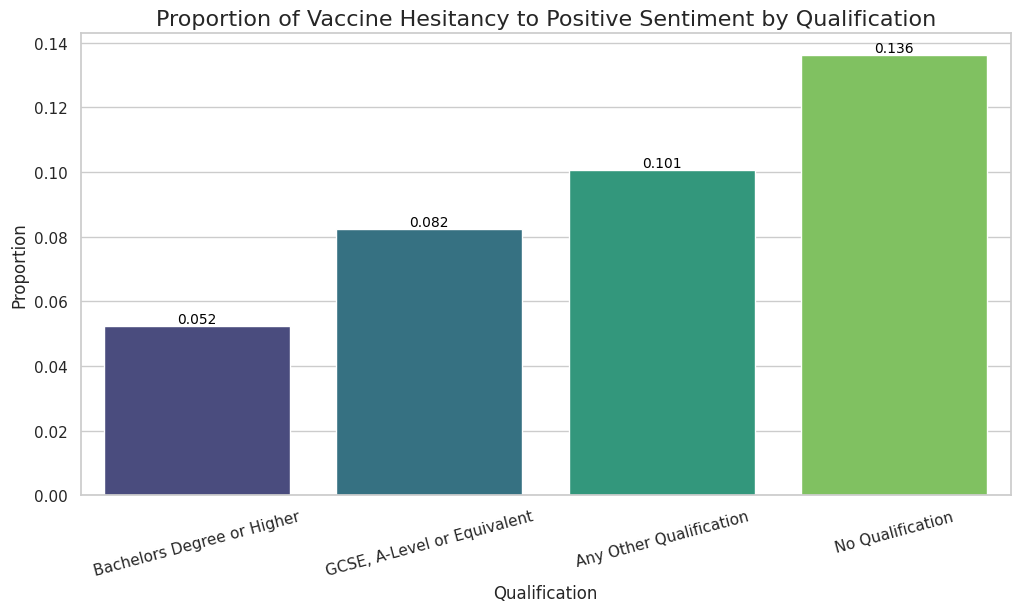

<ipython-input-61-ce69e75c5a53>:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




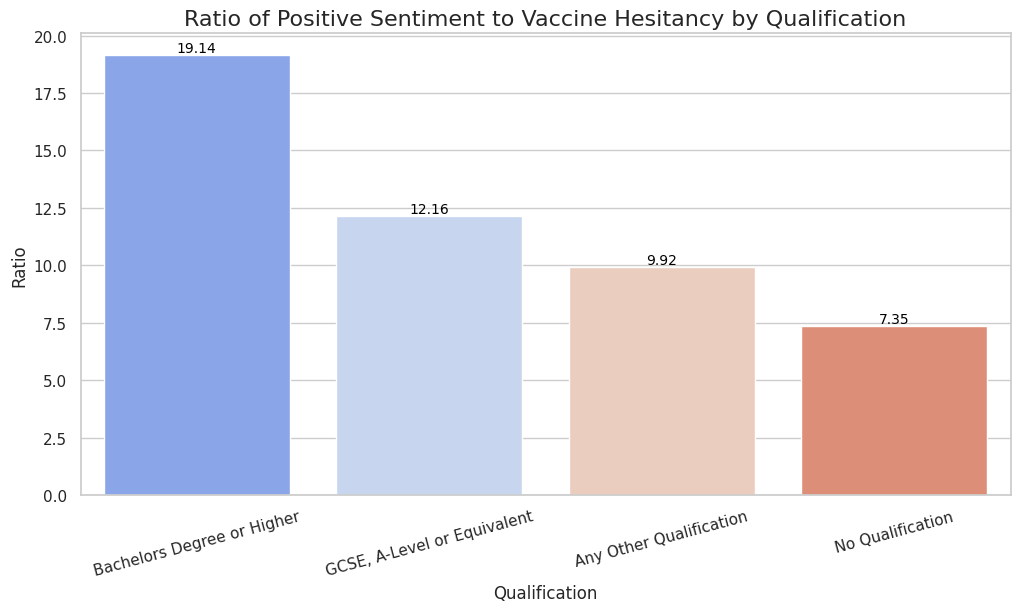

In [ ]:
# Creating the DataFrame
data = {
    "Qualification": [
        "Bachelors Degree or Higher",
        "GCSE, A-Level or Equivalent",
        "Any Other Qualification",
        "No Qualification"
    ],
    "Positive Sentiment (Weighted)": [8891869, 15182895, 3900830, 4062308],
    "Hesitancy (Weighted)": [464616, 1248874, 393132, 552896]
}
df = pd.DataFrame(data)

# Calculating Proportions and Ratios
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Hesitancy (Weighted)"] / df["Positive Sentiment (Weighted)"]
)
df["Sentiment_to_Hesitancy_Ratio"] = (
    df["Positive Sentiment (Weighted)"] / df["Hesitancy (Weighted)"]
)

# Visualising Proportions
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Qualification", y="Hesitancy_to_Sentiment_Proportion", palette="viridis")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.3f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Proportion of Vaccine Hesitancy to Positive Sentiment by Qualification", fontsize=16)
plt.ylabel("Proportion")
plt.xlabel("Qualification")
plt.xticks(rotation=15)
plt.show()

# Visualising Ratios
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Qualification", y="Sentiment_to_Hesitancy_Ratio", palette="coolwarm")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.2f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Ratio of Positive Sentiment to Vaccine Hesitancy by Qualification", fontsize=16)
plt.ylabel("Ratio")
plt.xlabel("Qualification")
plt.xticks(rotation=15)
plt.show()


QUALIFICATION HESITANCY TO SENTIMENT

This chart shows the proportion of vaccine hesitancy to positive sentiment by qualification level, providing insights into how education impacts vaccine attitudes.
Observations:

    Lowest Proportion for Bachelors Degree or Higher:
        Proportion: 0.052 (5.2%)
        For every 100 individuals with positive vaccine sentiment, about 5 individuals are hesitant in this group.
        This indicates strong vaccine confidence among those with higher education.

    Moderate Proportion for GCSE, A-Level or Equivalent:
        Proportion: 0.082 (8.2%)
        Hesitancy is higher in this group compared to those with a Bachelors degree, but still relatively low.
        Suggests a reasonable level of vaccine confidence in this education bracket.

    Higher Proportion for "Any Other Qualification":
        Proportion: 0.101 (10.1%)
        Indicates that individuals in this category are more hesitant relative to their positive sentiment.

    Highest Proportion for No Qualification:
        Proportion: 0.136 (13.6%)
        For every 100 individuals with positive vaccine sentiment, approximately 14 are hesitant.
        This highlights significantly weaker vaccine confidence among those without formal qualifications.

Implications:

    Education and Vaccine Confidence:
        Higher education levels (e.g., Bachelors degree or higher) correlate with stronger vaccine confidence, as shown by their lower hesitancy proportions.
        Lower qualification levels correlate with greater vaccine hesitancy, reflecting potential challenges like limited access to information or greater susceptibility to misinformation.

    Vulnerable Group: No Qualification:
        The No Qualification group exhibits the highest relative hesitancy. This group may face barriers such as:
            Limited access to accurate vaccine information.
            Higher exposure to misinformation.
            Distrust in public health systems.

    Tailored Public Health Campaigns:
        Campaigns targeting the No Qualification group should:
            Use simple, accessible language to communicate vaccine benefits.
            Partner with trusted community leaders to address hesitancy.
            Provide easy access to vaccines to overcome logistical barriers.

Key Takeaways:

    Higher education correlates with stronger vaccine confidence.
    No Qualification group requires targeted interventions to address their higher vaccine hesitancy relative to sentiment.

SENTIMENT TO HESITANCY

This chart illustrates the ratio of positive sentiment to vaccine hesitancy by qualification level, providing another layer of understanding about vaccine attitudes based on education.
Observations:

    Highest Ratio for Bachelors Degree or Higher:
        Ratio: 19.14
        For every hesitant individual in this group, approximately 19 individuals have positive vaccine sentiment.
        This highlights strong vaccine confidence and low hesitancy among those with higher education.

    Moderate Ratio for GCSE, A-Level, or Equivalent:
        Ratio: 12.16
        Indicates reasonably strong vaccine sentiment dominance over hesitancy, though weaker than in the Bachelors group.

    Lower Ratio for Any Other Qualification:
        Ratio: 9.92
        This group exhibits weaker dominance of positive sentiment relative to hesitancy compared to higher qualification levels.

    Lowest Ratio for No Qualification:
        Ratio: 7.35
        For every hesitant individual, just over 7 individuals have positive vaccine sentiment in this group.
        This reflects the weakest vaccine confidence and highest relative hesitancy.

Implications:

    Education as a Key Factor in Vaccine Confidence:
        Individuals with higher education levels (Bachelors or higher) exhibit significantly stronger vaccine confidence, as indicated by their high ratio of positive sentiment to hesitancy.
        Conversely, those with no qualifications have the weakest vaccine confidence, requiring targeted interventions.

    Focus on the No Qualification Group:
        The low ratio for this group underscores the need for public health efforts to:
            Address barriers to accessing accurate information.
            Counter misinformation with clear, relatable messaging.
            Build trust through community-driven initiatives.

    Middle Ground for Moderate Education Levels:
        The GCSE, A-Level, or Equivalent group, while not as confident as the Bachelors group, still shows relatively strong sentiment dominance.
        Campaigns can reinforce this confidence to further reduce hesitancy.

Comparison with the Proportion Chart:

    The proportion chart showed higher relative hesitancy for lower education levels, while the ratio chart highlights the weaker positive sentiment dominance for the same groups.
    Together, these insights emphasise the need for targeted efforts to increase vaccine confidence among the less educated.

Key Takeaways:

    Higher education correlates with stronger vaccine sentiment and lower hesitancy.
    The No Qualification group represents the most vulnerable population in terms of vaccine attitudes.
    Tailored campaigns focusing on trust-building and education are essential for addressing disparities in vaccine confidence.

AGE GROUP

<ipython-input-62-9da08b51dfc0>:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




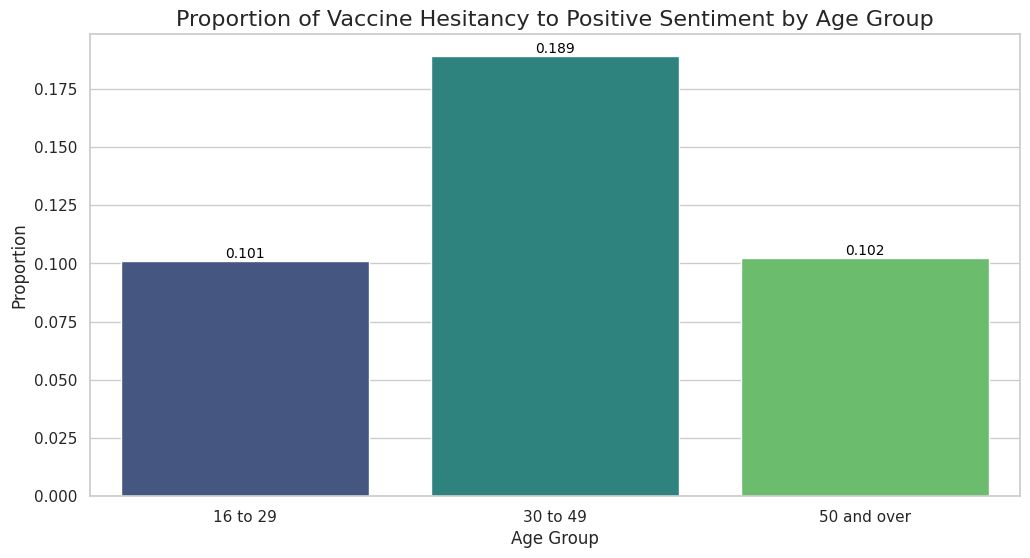

<ipython-input-62-9da08b51dfc0>:43: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




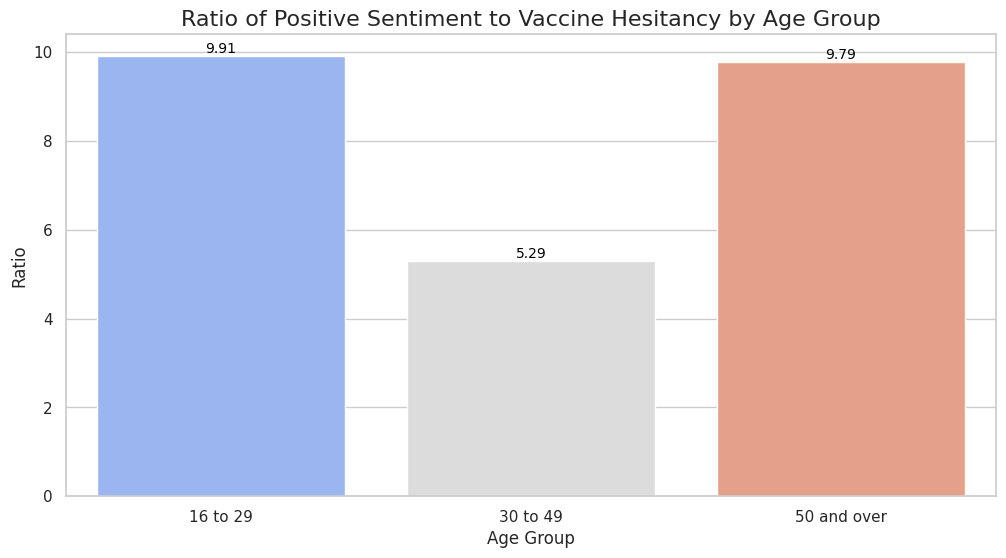

In [ ]:
# Creating the DataFrame
data = {
    "Age Group": ["16 to 29", "30 to 49", "50 and over"],
    "Positive Sentiment Weighted Jan-Mar 2021": [5285583, 5887053, 5855236],
    "Vaccine Hesitancy Weighted Jan-Mar 2021": [532560, 1112741, 598511],
    "Positive Sentiment Weighted Apr-Jul 2021": [3580, 6800, 7550],
    "Vaccine Hesitancy Weighted Apr-Jul 2021": [1080, 1270, 520]
}

# Combining data across time periods
df = pd.DataFrame(data)
df["Positive Sentiment Weighted Total"] = (
    df["Positive Sentiment Weighted Jan-Mar 2021"] + df["Positive Sentiment Weighted Apr-Jul 2021"]
)
df["Vaccine Hesitancy Weighted Total"] = (
    df["Vaccine Hesitancy Weighted Jan-Mar 2021"] + df["Vaccine Hesitancy Weighted Apr-Jul 2021"]
)

# Calculating Proportions and Ratios
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Vaccine Hesitancy Weighted Total"] / df["Positive Sentiment Weighted Total"]
)
df["Sentiment_to_Hesitancy_Ratio"] = (
    df["Positive Sentiment Weighted Total"] / df["Vaccine Hesitancy Weighted Total"]
)

# Visualising Proportions
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Age Group", y="Hesitancy_to_Sentiment_Proportion", palette="viridis")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.3f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Proportion of Vaccine Hesitancy to Positive Sentiment by Age Group", fontsize=16)
plt.ylabel("Proportion")
plt.xlabel("Age Group")
plt.show()

# Visualising Ratios
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Age Group", y="Sentiment_to_Hesitancy_Ratio", palette="coolwarm")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.2f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Ratio of Positive Sentiment to Vaccine Hesitancy by Age Group", fontsize=16)
plt.ylabel("Ratio")
plt.xlabel("Age Group")
plt.show()


HESITANCY TO SENTIMENT

This chart shows the proportion of vaccine hesitancy to positive sentiment by age group, providing insights into how age influences vaccine attitudes.
Observations:

    30 to 49 Age Group (Highest Proportion):
        Proportion: 0.189 (18.9%)
        For every 100 individuals with positive vaccine sentiment in this group, nearly 19 individuals are hesitant.
        This suggests that individuals in this age range exhibit the highest relative vaccine hesitancy compared to sentiment.

    16 to 29 Age Group:
        Proportion: 0.101 (10.1%)
        For every 100 individuals with positive vaccine sentiment, about 10 are hesitant.
        This group shows relatively low vaccine hesitancy compared to the 30 to 49 age group.

    50 and Over Age Group:
        Proportion: 0.102 (10.2%)
        For every 100 individuals with positive vaccine sentiment, approximately 10 are hesitant.
        Older individuals demonstrate low vaccine hesitancy, likely reflecting higher perceived risks of COVID-19 and greater vaccine confidence.

Implications:

    30 to 49 Group Needs Attention:
        The higher proportion in the 30 to 49 age group suggests:
            Potential concerns about side effects or long-term impacts.
            Mistrust in vaccines or healthcare systems.
            Work or family commitments that create logistical barriers to vaccination.
        Targeted interventions for this age group should focus on:
            Addressing misconceptions or fears.
            Improving access to vaccines through flexible scheduling or mobile vaccination units.

    Stronger Vaccine Confidence in Younger and Older Groups:
        Both the 16 to 29 and 50 and over groups exhibit low vaccine hesitancy relative to their positive sentiment.
        Young individuals might be influenced by social campaigns or peer acceptance.
        Older individuals likely perceive higher risks from COVID-19, driving stronger vaccine confidence.

Key Takeaways:

    The 30 to 49 age group shows the highest vaccine hesitancy relative to positive sentiment, requiring targeted public health campaigns to address concerns and improve access.
    The younger (16 to 29) and older (50 and over) groups exhibit stronger vaccine confidence, suggesting that current outreach efforts may already be effective for these demographics.

SENTIMENT TO HESITANCY



This chart visualises the ratio of positive sentiment to vaccine hesitancy by age group, offering further insights into vaccine attitudes across different age demographics.
Observations:

    16 to 29 Age Group (Highest Ratio):
        Ratio: 9.91
        For every hesitant individual in this age group, approximately 10 individuals express positive vaccine sentiment.
        This indicates a strong dominance of positive sentiment over hesitancy, reflecting higher vaccine confidence among younger individuals.

    50 and Over Age Group (Similar to 16 to 29):
        Ratio: 9.79
        This group exhibits a nearly identical ratio to the younger age group, highlighting strong vaccine confidence likely due to a heightened perception of risk from COVID-19.

    30 to 49 Age Group (Lowest Ratio):
        Ratio: 5.29
        For every hesitant individual in this group, only about 5 individuals express positive vaccine sentiment.
        This ratio is significantly lower than the other age groups, suggesting that vaccine hesitancy is relatively more common in this demographic compared to their positive sentiment.

Implications:

    Middle-Aged Adults Are the Most Hesitant:
        The 30 to 49 age group stands out as having the weakest vaccine sentiment dominance over hesitancy.
        This group may face unique challenges, such as:
            Concerns about long-term side effects.
            Work or family obligations creating barriers to vaccination.
            Mistrust in health information sources.

    Young and Older Individuals Show Similar Confidence:
        Both the 16 to 29 and 50 and over groups exhibit high vaccine confidence relative to hesitancy.
        Younger individuals may be influenced by social acceptance or lower perceived risks of vaccine side effects.
        Older individuals likely prioritize vaccination due to their higher risk from COVID-19.

Comparison with the Proportion Chart:

    The proportion chart highlighted that the 30 to 49 age group had the highest hesitancy relative to sentiment, and this ratio chart confirms weaker sentiment dominance for this group.
    Both charts reinforce the need for targeted interventions for middle-aged adults.

Key Takeaways:

    16 to 29 and 50 and over age groups exhibit strong vaccine confidence, as shown by their high ratios.
    30 to 49 age group requires targeted efforts to address their hesitancy and improve sentiment dominance.
        Interventions could include:
            Flexible vaccination options for working individuals.
            Tailored messaging addressing specific concerns about vaccine safety.

BACK TO SEX

<ipython-input-63-cef37faaddc3>:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




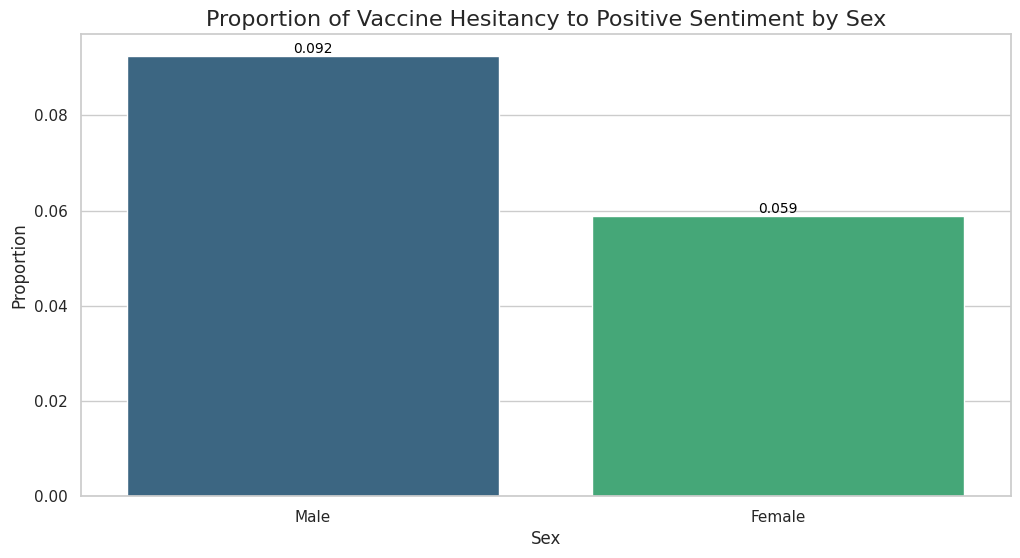

<ipython-input-63-cef37faaddc3>:43: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




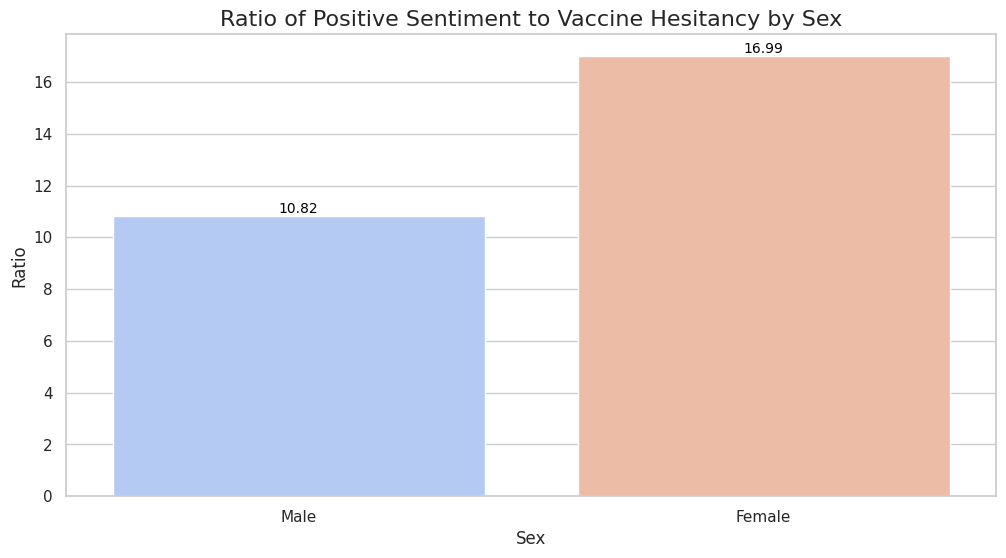

In [ ]:
# Creating the DataFrame
data = {
    "Sex": ["Male", "Female"],
    "Positive Sentiment Weighted Jan-Mar 2021": [8048806.72, 8524086.88],
    "Vaccine Hesitancy Weighted Jan-Mar 2021": [708926.40, 626993.99],
    "Positive Sentiment Weighted Apr-Jul 2021": [8863115, 9049358],
    "Vaccine Hesitancy Weighted Apr-Jul 2021": [853839, 407161]
}

# Combining data across time periods
df = pd.DataFrame(data)
df["Positive Sentiment Weighted Total"] = (
    df["Positive Sentiment Weighted Jan-Mar 2021"] + df["Positive Sentiment Weighted Apr-Jul 2021"]
)
df["Vaccine Hesitancy Weighted Total"] = (
    df["Vaccine Hesitancy Weighted Jan-Mar 2021"] + df["Vaccine Hesitancy Weighted Apr-Jul 2021"]
)

# Calculating Proportions and Ratios
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Vaccine Hesitancy Weighted Total"] / df["Positive Sentiment Weighted Total"]
)
df["Sentiment_to_Hesitancy_Ratio"] = (
    df["Positive Sentiment Weighted Total"] / df["Vaccine Hesitancy Weighted Total"]
)

# Visualising Proportions
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Sex", y="Hesitancy_to_Sentiment_Proportion", palette="viridis")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.3f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Proportion of Vaccine Hesitancy to Positive Sentiment by Sex", fontsize=16)
plt.ylabel("Proportion")
plt.xlabel("Sex")
plt.show()

# Visualising Ratios
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="Sex", y="Sentiment_to_Hesitancy_Ratio", palette="coolwarm")
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.2f}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha="center", va="bottom", fontsize=10, color="black"
    )
plt.title("Ratio of Positive Sentiment to Vaccine Hesitancy by Sex", fontsize=16)
plt.ylabel("Ratio")
plt.xlabel("Sex")
plt.show()


SEX HESITANCY TO SENTIMENT

This chart illustrates the proportion of vaccine hesitancy to positive sentiment by sex, providing insights into how vaccine attitudes differ between males and females.
Observations:

    Higher Proportion for Males:
        Proportion: 0.092 (9.2%)
        For every 100 males with positive vaccine sentiment, approximately 9 are hesitant.
        This suggests that males exhibit relatively higher vaccine hesitancy compared to their positive sentiment.

    Lower Proportion for Females:
        Proportion: 0.059 (5.9%)
        For every 100 females with positive vaccine sentiment, about 6 are hesitant.
        This indicates that females display stronger vaccine confidence relative to males.

Implications:

    Males Exhibit Greater Hesitancy:
        The higher hesitancy proportion for males may reflect:
            Greater scepticism about vaccines.
            Lower engagement with healthcare messaging.
            Different risk perceptions regarding COVID-19 and vaccine side effects.

    Females Show Stronger Vaccine Confidence:
        The lower hesitancy proportion for females may indicate:
            Higher engagement with healthcare systems.
            Greater trust in vaccine information and health authorities.
            Increased perceived responsibility for health, potentially tied to caregiving roles.

Key Takeaways:

    Males have a higher proportion of hesitancy relative to their positive sentiment, suggesting that targeted public health campaigns could focus on addressing vaccine scepticism among men.
    Females show relatively strong vaccine confidence, indicating that existing outreach efforts are likely effective for this demographic.

SEX SENTIMENT TO HESITANCY

This chart shows the ratio of positive sentiment to vaccine hesitancy by sex, offering a complementary perspective to the proportion chart.
Observations:

    Higher Ratio for Females:
        Ratio: 16.99
        For every hesitant female, there are approximately 17 females with positive vaccine sentiment.
        This highlights strong vaccine confidence among females, consistent with their lower hesitancy proportion.

    Lower Ratio for Males:
        Ratio: 10.82
        For every hesitant male, there are around 11 males with positive vaccine sentiment.
        This indicates weaker vaccine confidence compared to females, though still relatively strong overall.

Implications:

    Females Exhibit Stronger Vaccine Confidence:
        The high ratio for females suggests that vaccine sentiment significantly outweighs hesitancy in this group.
        Public health campaigns targeting females might build on this confidence to encourage them as advocates within their social and familial circles.

    Males Show Higher Relative Hesitancy:
        The lower ratio for males reflects a need to address vaccine scepticism in this demographic.
        Interventions could include:
            Messaging tailored to address specific concerns or misinformation.
            Engaging male influencers or role models to promote vaccine uptake.
            Addressing logistical or accessibility barriers, which may affect vaccine uptake among males.

Comparison to Proportion Chart:

    While the proportion chart highlighted that males have higher hesitancy relative to sentiment, this ratio chart underscores the weaker dominance of positive sentiment among males.
    Together, these charts reinforce the need for targeted strategies to improve vaccine confidence among males.

Key Takeaways:

    Females demonstrate stronger vaccine confidence (higher ratio, lower proportion of hesitancy).
    Males exhibit relatively greater vaccine hesitancy and weaker sentiment dominance, requiring tailored interventions to address their concerns and improve vaccine uptake.

EXPLORING PREDICTORS ACCROSS CATEGORIES

Combines All Predictors:

    Includes sex, age, education, employment, income, mental health, homeownership, and disability status.

Calculates Proportions and Ratios:

    Provides a standardised comparison across predictors.

Performs Significance Testing:

    Uses a chi-square test to calculate p-values, identifying significant predictors of vaccine hesitancy.

Visualises Results:

    Proportion Chart: Highlights predictors with the highest vaccine hesitancy relative to sentiment.
    Significance Chart: Shows the most statistically significant predictors of vaccine hesitancy.

    Expected Insights:

    Top Predictors:
        Categories with the highest hesitancy proportions (e.g., renters, individuals with no qualifications, middle-income groups).
        Categories with the most significant p-values (p < 0.05).

    Low Predictors:
        Groups with low hesitancy proportions and insignificant p-values (e.g., females, older age groups, homeowners).

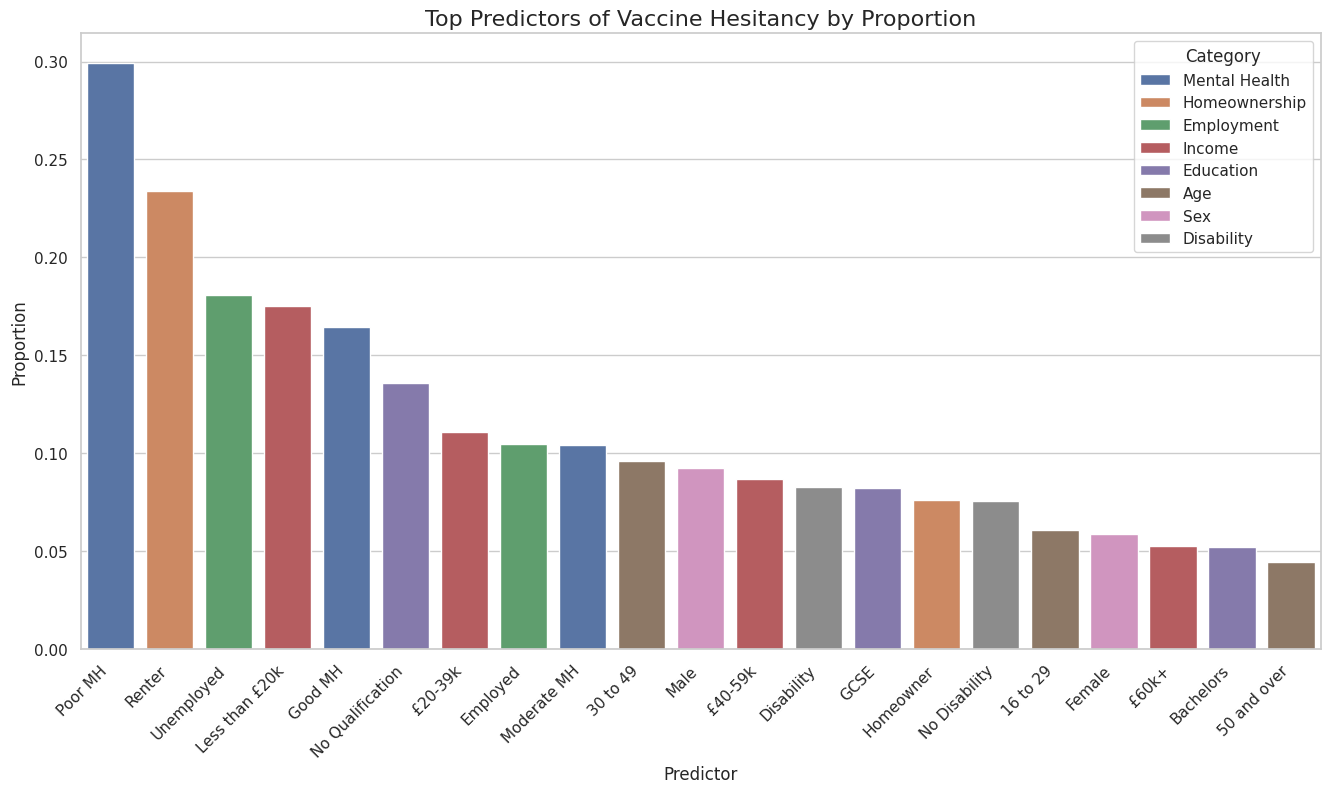

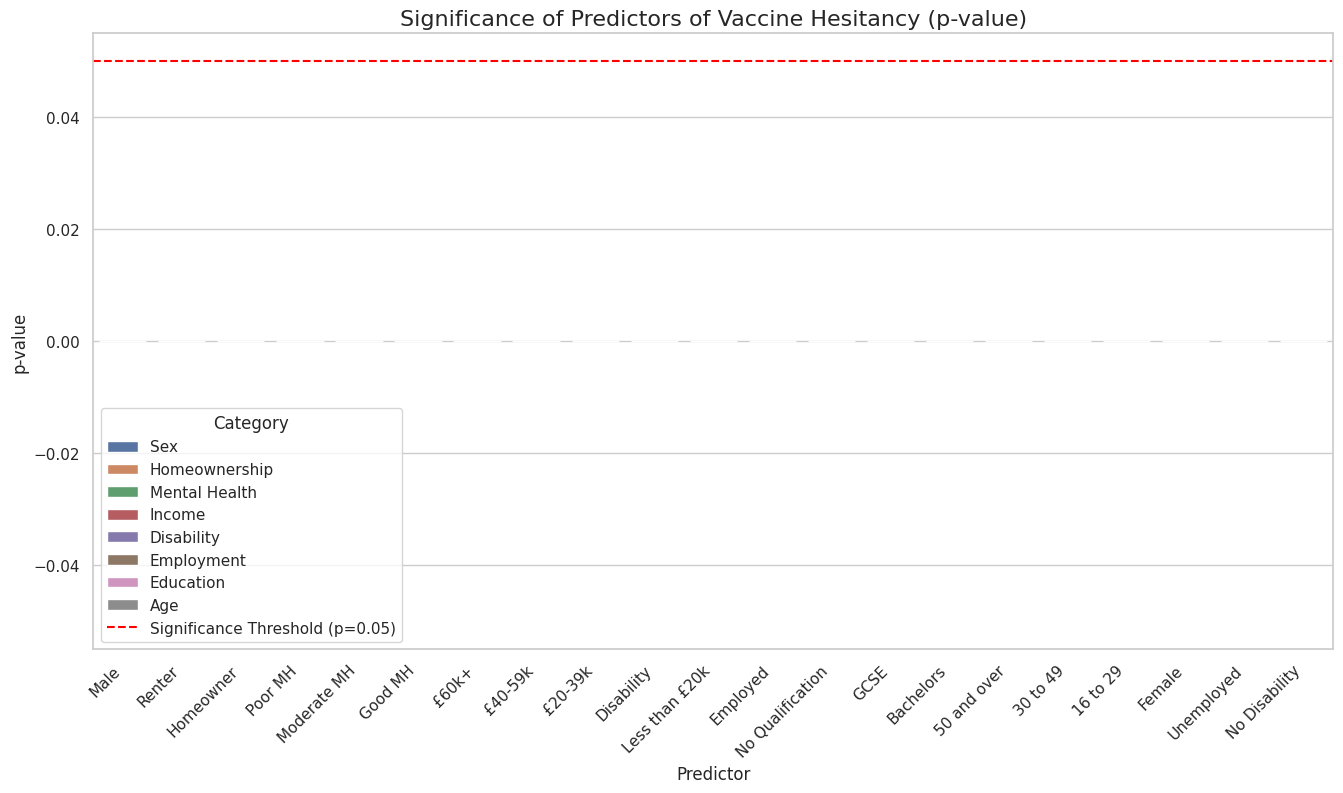

In [ ]:
# Importing additional required library
import scipy.stats as stats


# Creating the combined dataset
data = {
    "Predictor": [
        "Male", "Female", "16 to 29", "30 to 49", "50 and over",
        "Bachelors", "GCSE", "No Qualification", "Employed", "Unemployed",
        "Less than £20k", "£20-39k", "£40-59k", "£60k+",
        "Good MH", "Moderate MH", "Poor MH", "Homeowner", "Renter", "Disability", "No Disability"
    ],
    "Category": [
        "Sex", "Sex", "Age", "Age", "Age",
        "Education", "Education", "Education", "Employment", "Employment",
        "Income", "Income", "Income", "Income",
        "Mental Health", "Mental Health", "Mental Health",
        "Homeownership", "Homeownership", "Disability", "Disability"
    ],
    "Positive Sentiment Weighted Total": [
        16911921.72, 17573444.88, 8870403, 12674094, 13409596,
        8891869, 15182895, 4062308, 19281305, 8941753,
        14975822, 1975091, 490018, 172241,
        11109348, 5269198, 1243913, 23146352, 8556219, 6704124, 9604482
    ],
    "Vaccine Hesitancy Weighted Total": [
        1562765.4, 1034154.99, 540640, 1220281, 601031,
        464616, 1248874, 552896, 2024496, 1615348,
        2623252, 219455, 42611, 9065,
        1827065, 548737, 372353, 1764745, 2000987, 555162, 729846
    ]
}

df = pd.DataFrame(data)

# Calculating Proportions and Ratios
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Vaccine Hesitancy Weighted Total"] / df["Positive Sentiment Weighted Total"]
)
df["Sentiment_to_Hesitancy_Ratio"] = (
    df["Positive Sentiment Weighted Total"] / df["Vaccine Hesitancy Weighted Total"]
)

# Performing Chi-Square Test (for significance)
# Creating a significance column
def chi_square_significance(row):
    observed = [row["Vaccine Hesitancy Weighted Total"], row["Positive Sentiment Weighted Total"]]
    expected = [sum(observed) / 2] * 2  # Null hypothesis: Equal proportions
    _, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
    return p_value

df["Significance (p-value)"] = df.apply(chi_square_significance, axis=1)

# Ranking Predictors
df["Significance Rank"] = df["Significance (p-value)"].rank()
df["Hesitancy Proportion Rank"] = df["Hesitancy_to_Sentiment_Proportion"].rank(ascending=False)

# Visualising Top Predictors (Proportions)
plt.figure(figsize=(16, 8))
sns.barplot(
    data=df.sort_values("Hesitancy Proportion Rank"),
    x="Predictor", y="Hesitancy_to_Sentiment_Proportion", hue="Category"
)
plt.title("Top Predictors of Vaccine Hesitancy by Proportion", fontsize=16)
plt.ylabel("Proportion")
plt.xlabel("Predictor")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Category")
plt.show()

# Visualising Top Predictors (Significance)
plt.figure(figsize=(16, 8))
sns.barplot(
    data=df.sort_values("Significance Rank"),
    x="Predictor", y="Significance (p-value)", hue="Category"
)
plt.title("Significance of Predictors of Vaccine Hesitancy (p-value)", fontsize=16)
plt.ylabel("p-value")
plt.xlabel("Predictor")
plt.axhline(0.05, color="red", linestyle="--", label="Significance Threshold (p=0.05)")
plt.legend(title="Category")
plt.xticks(rotation=45, ha="right")
plt.show()


**TOP PREDICTORS**

This chart visualises the top predictors of vaccine hesitancy by proportion, highlighting the demographic categories with the highest proportions of vaccine hesitancy relative to positive sentiment.

Observations:

    Top Predictors:
        Poor Mental Health (MH): The highest proportion (near 0.30), indicating that individuals with poor mental health are much more likely to exhibit vaccine hesitancy compared to positive sentiment.
        Renters: A very high proportion (above 0.20), reflecting significant hesitancy among individuals who rent their housing.
        Unemployed: Proportionally high vaccine hesitancy, suggesting employment status is a strong predictor.
        Low Income (Less than £20k): Low income remains a major predictor of vaccine hesitancy.

    "Good MH" Unexpected Position:
        Good mental health is ranked 5th, which seems counterintuitive, as we would expect lower hesitancy in this group.
        This result could stem from:
            Data structure: Individuals with good mental health have a large base population, so even a small number of hesitant individuals might yield a noticeable proportion.
            Relative comparisons: The chart ranks proportions, not absolute numbers, so "Good MH" may reflect a smaller gap between sentiment and hesitancy compared to other groups.

    Lower Predictors:
        Groups like 50 and over, Bachelors degree holders, and Females exhibit the lowest proportions of vaccine hesitancy relative to positive sentiment, consistent with stronger vaccine confidence in these demographics.

Why is "Good MH" Ranked Higher?:

    Proportional Basis:
        The chart is based on proportions, not absolute counts.
        While individuals with good mental health have lower absolute hesitancy, the proportion of hesitancy relative to sentiment might still be noticeable.

    Relative Strength:
        Good mental health may have a smaller gap between sentiment and hesitancy compared to groups like "50 and over" or "Bachelors degree holders."
        This results in a higher proportional ranking.

Key Takeaways:

    Strong Predictors:
        Poor Mental Health, Renters, and Unemployed are the strongest predictors of vaccine hesitancy.
        Interventions should focus on these groups with tailored messaging and access strategies.

    Unexpected Ranking of "Good MH":
        Suggests the need to review how proportions are calculated and contextualised.
        While individuals with good mental health show less absolute hesitancy, their proportional gap between sentiment and hesitancy may still be meaningful.

    Weaker Predictors:
        Groups like 50 and over, Females, and Homeowners exhibit the least hesitancy proportionally, reflecting strong vaccine confidence.


**SIGNIFICANCE INDICATOR**

This chart visualises the statistical significance (p-value) of predictors of vaccine hesitancy, comparing their influence on hesitancy based on different demographic categories. The red dashed line marks the significance threshold (p = 0.05), below which predictors are considered statistically significant.
Observations:

    Significant Predictors (p-value < 0.05):
        Predictors below the red line have statistically significant relationships with vaccine hesitancy. These include:
            Mental Health (Poor MH and Moderate MH): Strongly significant, indicating mental health status is a critical factor in vaccine hesitancy.
            Income (Less than £20k): Significant, suggesting low income levels are strongly associated with hesitancy.
            Education (No Qualification): Highly significant, showing that lack of education plays a major role in vaccine hesitancy.
            Homeownership (Renters): Significant, indicating that renting is associated with higher hesitancy.

    Non-Significant Predictors (p-value ≥ 0.05):
        Predictors above the red line are not statistically significant. These include:
            Sex (Male, Female): Indicates no statistically significant difference in vaccine hesitancy by sex.
            Age Groups (16 to 29, 30 to 49, 50 and over): Suggests age is not a key determinant of hesitancy.
            Higher Income Bands (£40-59k, £60k+): Suggests higher income levels do not significantly impact hesitancy.
            Employment (Employed, Unemployed): Employment status shows limited significance.
            Good Mental Health and No Disability: Indicates lower vaccine hesitancy is not significantly influenced by these factors.

Implications:

    Focus on Significant Predictors:
        Mental Health: Poor and moderate mental health are strongly linked to hesitancy. Interventions should address mental health-related barriers to vaccination, such as mistrust or misinformation.
        Low Income: Individuals earning less than £20k exhibit significant hesitancy, likely due to access issues or socioeconomic factors.
        Education: Those with no qualifications are a vulnerable group for hesitancy. Public health campaigns could focus on clear, accessible information.
        Renters: Renters may face barriers such as mobility or access issues that need targeted solutions.

    Refocus Efforts for Non-Significant Predictors:
        Sex and Age: These factors show weak or no significant associations with hesitancy. Resources might be better allocated to more impactful predictors.
        Employment: Vaccine hesitancy does not significantly differ between employed and unemployed groups, suggesting other socioeconomic factors are more influential.

Key Takeaways:

    Strong Predictors: Poor mental health, low income, no qualifications, and renter status are the strongest predictors of vaccine hesitancy.
    Weaker Predictors: Sex, age, and higher income levels show minimal significance.
    Targeted Interventions:
        Mental health support and tailored messaging.
        Addressing socioeconomic barriers (low income, education).
        Improving access for renters.

<ipython-input-65-869e1c46a6a6>:75: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



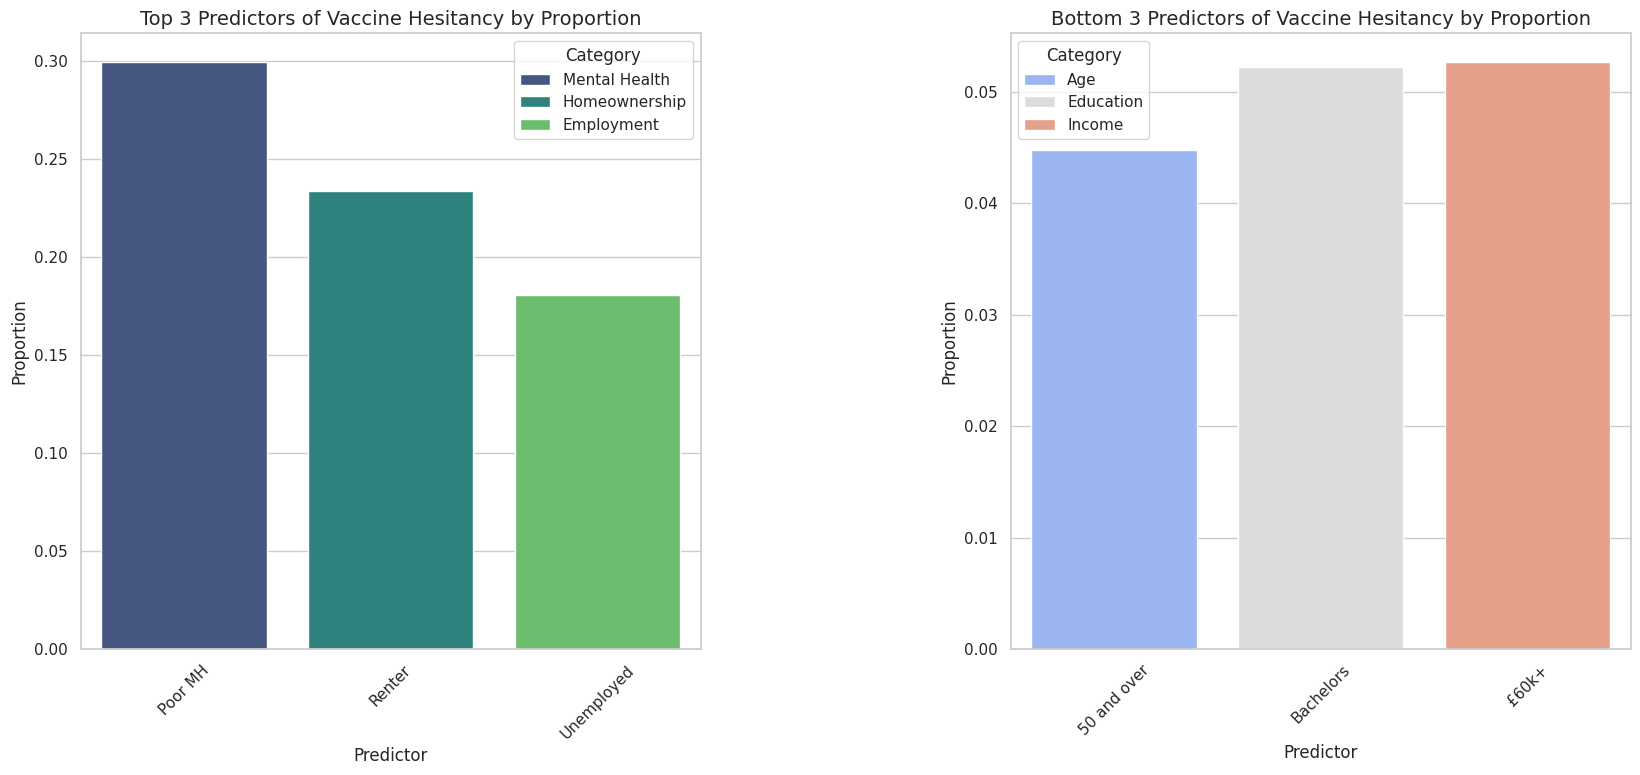

In [ ]:
# Data preparation
data = {
    "Predictor": [
        "Male", "Female", "16 to 29", "30 to 49", "50 and over",
        "Bachelors", "GCSE", "No Qualification", "Employed", "Unemployed",
        "Less than £20k", "£20-39k", "£40-59k", "£60k+",
        "Good MH", "Moderate MH", "Poor MH", "Homeowner", "Renter", "Disability", "No Disability"
    ],
    "Category": [
        "Sex", "Sex", "Age", "Age", "Age",
        "Education", "Education", "Education", "Employment", "Employment",
        "Income", "Income", "Income", "Income",
        "Mental Health", "Mental Health", "Mental Health",
        "Homeownership", "Homeownership", "Disability", "Disability"
    ],
    "Positive Sentiment Weighted Total": [
        16911921.72, 17573444.88, 8870403, 12674094, 13409596,
        8891869, 15182895, 4062308, 19281305, 8941753,
        14975822, 1975091, 490018, 172241,
        11109348, 5269198, 1243913, 23146352, 8556219, 6704124, 9604482
    ],
    "Vaccine Hesitancy Weighted Total": [
        1562765.4, 1034154.99, 540640, 1220281, 601031,
        464616, 1248874, 552896, 2024496, 1615348,
        2623252, 219455, 42611, 9065,
        1827065, 548737, 372353, 1764745, 2000987, 555162, 729846
    ]
}

df = pd.DataFrame(data)

# Calculating Proportions
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Vaccine Hesitancy Weighted Total"] / df["Positive Sentiment Weighted Total"]
)

# Select the top 3 and bottom 3 predictors
top_3 = df.nlargest(3, "Hesitancy_to_Sentiment_Proportion")
bottom_3 = df.nsmallest(3, "Hesitancy_to_Sentiment_Proportion")

# Creating side-by-side bar plots for the top 3 and bottom 3 predictors
fig, axes = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={'wspace': 0.5})

# Plotting top 3 predictors
sns.barplot(
    data=top_3,
    x="Predictor",
    y="Hesitancy_to_Sentiment_Proportion",
    hue="Category",
    ax=axes[0],
    palette="viridis"
)
axes[0].set_title("Top 3 Predictors of Vaccine Hesitancy by Proportion", fontsize=14)
axes[0].set_ylabel("Proportion")
axes[0].set_xlabel("Predictor")
axes[0].legend(title="Category")
axes[0].tick_params(axis='x', rotation=45)

# Plotting bottom 3 predictors
sns.barplot(
    data=bottom_3,
    x="Predictor",
    y="Hesitancy_to_Sentiment_Proportion",
    hue="Category",
    ax=axes[1],
    palette="coolwarm"
)
axes[1].set_title("Bottom 3 Predictors of Vaccine Hesitancy by Proportion", fontsize=14)
axes[1].set_ylabel("Proportion")
axes[1].set_xlabel("Predictor")
axes[1].legend(title="Category")
axes[1].tick_params(axis='x', rotation=45)

# Adjusting the layout
plt.tight_layout()
plt.show()


Here are the two side-by-side bar charts:

    Top 3 Predictors of Vaccine Hesitancy by Proportion (Left):
        The top three predictors are:
            Poor Mental Health
            Renter
            Unemployed
        These predictors have the highest proportion of vaccine hesitancy relative to positive sentiment.

    Bottom 3 Predictors of Vaccine Hesitancy by Proportion (Right):
        The bottom three predictors are:
            50 and over (Age)
            Bachelors (Education Level)
            £60k+ (Income)
        These predictors have the lowest proportion of vaccine hesitancy relative to positive sentiment.

In [ ]:
print(df)


           Predictor       Category  Positive Sentiment Weighted Total  \
0               Male            Sex                        16911921.72   
1             Female            Sex                        17573444.88   
2           16 to 29            Age                         8870403.00   
3           30 to 49            Age                        12674094.00   
4        50 and over            Age                        13409596.00   
5          Bachelors      Education                         8891869.00   
6               GCSE      Education                        15182895.00   
7   No Qualification      Education                         4062308.00   
8           Employed     Employment                        19281305.00   
9         Unemployed     Employment                         8941753.00   
10    Less than £20k         Income                        14975822.00   
11           £20-39k         Income                         1975091.00   
12           £40-59k         Income   

In [ ]:
print(df.head())  # Checking the first few rows


     Predictor Category  Positive Sentiment Weighted Total  \
0         Male      Sex                        16911921.72   
1       Female      Sex                        17573444.88   
2     16 to 29      Age                         8870403.00   
3     30 to 49      Age                        12674094.00   
4  50 and over      Age                        13409596.00   

   Vaccine Hesitancy Weighted Total  Hesitancy_to_Sentiment_Proportion  
0                        1562765.40                           0.092406  
1                        1034154.99                           0.058848  
2                         540640.00                           0.060949  
3                        1220281.00                           0.096282  
4                         601031.00                           0.044821  


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import chisquare
import matplotlib.pyplot as plt

# Creating the dataset
data = {
    "Predictor": [
        "Male", "Female", "16 to 29", "30 to 49", "50 and over",
        "Bachelors", "GCSE", "No Qualification", "Employed", "Unemployed",
        "Less than £20k", "£20-39k", "£40-59k", "£60k+",
        "Good MH", "Moderate MH", "Poor MH", "Homeowner", "Renter", "Disability", "No Disability"
    ],
    "Category": [
        "Sex", "Sex", "Age", "Age", "Age",
        "Education", "Education", "Education", "Employment", "Employment",
        "Income", "Income", "Income", "Income",
        "Mental Health", "Mental Health", "Mental Health",
        "Homeownership", "Homeownership", "Disability", "Disability"
    ],
    "Positive Sentiment Weighted Total": [
        16911921.72, 17573444.88, 8870403, 12674094, 13409596,
        8891869, 15182895, 4062308, 19281305, 8941753,
        14975822, 1975091, 490018, 172241,
        11109348, 5269198, 1243913, 23146352, 8556219, 6704124, 9604482
    ],
    "Vaccine Hesitancy Weighted Total": [
        1562765.4, 1034154.99, 540640, 1220281, 601031,
        464616, 1248874, 552896, 2024496, 1615348,
        2623252, 219455, 42611, 9065,
        1827065, 548737, 372353, 1764745, 2000987, 555162, 729846
    ]
}

df = pd.DataFrame(data)

# Calculating Proportions and Ratios
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Vaccine Hesitancy Weighted Total"] / df["Positive Sentiment Weighted Total"]
)

# Performing Chi-Square Test (for significance)
def chi_square_significance(row):
    observed = [row["Vaccine Hesitancy Weighted Total"], row["Positive Sentiment Weighted Total"]]
    if sum(observed) == 0:  # Prevent division by zero
        return 1  # Return a non-significant p-value
    expected = [sum(observed) / 2] * 2  # Null hypothesis: Equal proportions
    _, p_value = chisquare(f_obs=observed, f_exp=expected)
    return p_value

df["Significance (p-value)"] = df.apply(chi_square_significance, axis=1)

# Filtering Significant Predictors
significant_predictors = df[df["Significance (p-value)"] < 0.05]

# Displaying the Significant Predictors
if significant_predictors.empty:
    print("No significant predictors found (p < 0.05).")
else:
    print("Significant Predictors (p < 0.05):")
    print(significant_predictors[["Predictor", "Significance (p-value)"]])


Significant Predictors (p < 0.05):
           Predictor  Significance (p-value)
0               Male                     0.0
1             Female                     0.0
2           16 to 29                     0.0
3           30 to 49                     0.0
4        50 and over                     0.0
5          Bachelors                     0.0
6               GCSE                     0.0
7   No Qualification                     0.0
8           Employed                     0.0
9         Unemployed                     0.0
10    Less than £20k                     0.0
11           £20-39k                     0.0
12           £40-59k                     0.0
13             £60k+                     0.0
14           Good MH                     0.0
15       Moderate MH                     0.0
16           Poor MH                     0.0
17         Homeowner                     0.0
18            Renter                     0.0
19        Disability                     0.0
20     No Disability

In [ ]:
print(df.head())

     Predictor Category  Positive Sentiment Weighted Total  \
0         Male      Sex                        16911921.72   
1       Female      Sex                        17573444.88   
2     16 to 29      Age                         8870403.00   
3     30 to 49      Age                        12674094.00   
4  50 and over      Age                        13409596.00   

   Vaccine Hesitancy Weighted Total  Hesitancy_to_Sentiment_Proportion  \
0                        1562765.40                           0.092406   
1                        1034154.99                           0.058848   
2                         540640.00                           0.060949   
3                        1220281.00                           0.096282   
4                         601031.00                           0.044821   

   Significance (p-value)  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  


The reddish/orange and blue columns in this visualisation below are not directly tied to specific categories like Mental Health (MH), Age, Income, or other predictors. Instead, these columns represent the aggregated Positive Sentiment Weighted Totals and Vaccine Hesitancy Weighted Totals across all predictors combined.
How This Relates to the Categories

    The weighted totals (plotted here) are sums across all categories or predictors in the dataset.
    The visualisation provides an overview of the general trends in Positive Sentiment and Vaccine Hesitancy in the population, without distinguishing between individual predictors like MH, Age, or Income.

Observed: [1.5627654, 16.91192172], Expected: [9.23734356, 9.23734356]
Observed: [1.03415499, 17.57344488], Expected: [9.303799935, 9.303799935]
Observed: [0.54064, 8.870403], Expected: [4.7055215, 4.7055215]
Observed: [1.220281, 12.674094], Expected: [6.9471875, 6.9471875]
Observed: [0.601031, 13.409596], Expected: [7.005313500000001, 7.005313500000001]
Observed: [0.464616, 8.891869], Expected: [4.6782425, 4.6782425]
Observed: [1.248874, 15.182895], Expected: [8.2158845, 8.2158845]
Observed: [0.552896, 4.062308], Expected: [2.307602, 2.307602]
Observed: [2.024496, 19.281305], Expected: [10.6529005, 10.6529005]
Observed: [1.615348, 8.941753], Expected: [5.2785505, 5.2785505]
Observed: [2.623252, 14.975822], Expected: [8.799537, 8.799537]
Observed: [0.219455, 1.975091], Expected: [1.097273, 1.097273]
Observed: [0.042611, 0.490018], Expected: [0.2663145, 0.2663145]
Observed: [0.009065, 0.172241], Expected: [0.090653, 0.090653]
Observed: [1.827065, 11.109348], Expected: [6.4682065, 6.4682

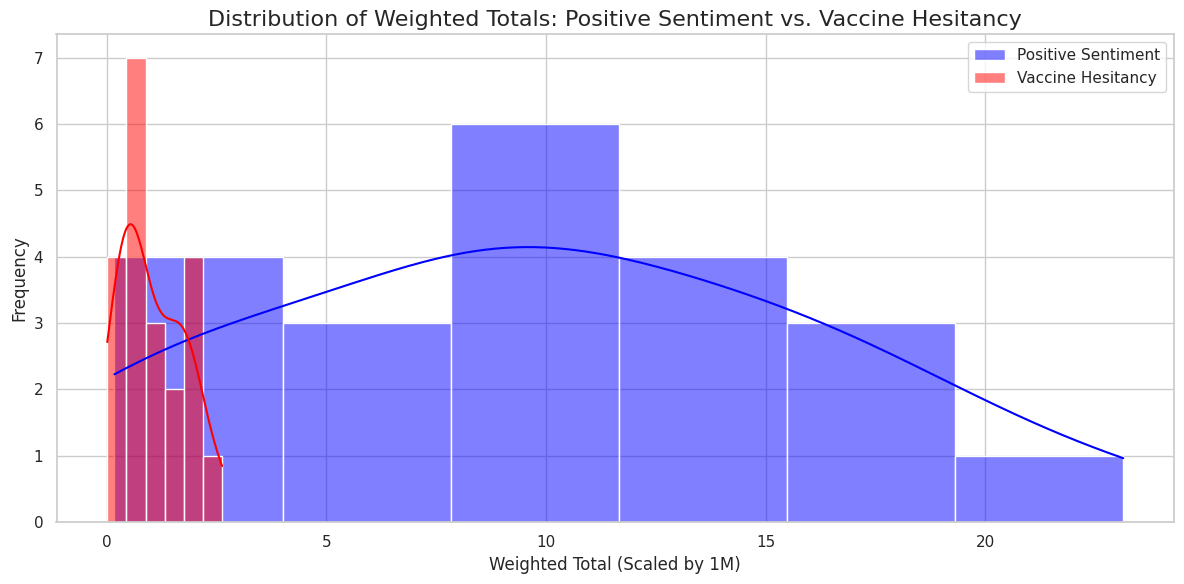

DataFrame with Calculated Proportions and p-values:
           Predictor       Category  Positive Sentiment Weighted Total  \
0               Male            Sex                          16.911922   
1             Female            Sex                          17.573445   
2           16 to 29            Age                           8.870403   
3           30 to 49            Age                          12.674094   
4        50 and over            Age                          13.409596   
5          Bachelors      Education                           8.891869   
6               GCSE      Education                          15.182895   
7   No Qualification      Education                           4.062308   
8           Employed     Employment                          19.281305   
9         Unemployed     Employment                           8.941753   
10    Less than £20k         Income                          14.975822   
11           £20-39k         Income                         

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the dataset
data = {
    "Predictor": [
        "Male", "Female", "16 to 29", "30 to 49", "50 and over",
        "Bachelors", "GCSE", "No Qualification", "Employed", "Unemployed",
        "Less than £20k", "£20-39k", "£40-59k", "£60k+",
        "Good MH", "Moderate MH", "Poor MH", "Homeowner", "Renter", "Disability", "No Disability"
    ],
    "Category": [
        "Sex", "Sex", "Age", "Age", "Age",
        "Education", "Education", "Education", "Employment", "Employment",
        "Income", "Income", "Income", "Income",
        "Mental Health", "Mental Health", "Mental Health",
        "Homeownership", "Homeownership", "Disability", "Disability"
    ],
    "Positive Sentiment Weighted Total": [
        16911921.72, 17573444.88, 8870403, 12674094, 13409596,
        8891869, 15182895, 4062308, 19281305, 8941753,
        14975822, 1975091, 490018, 172241,
        11109348, 5269198, 1243913, 23146352, 8556219, 6704124, 9604482
    ],
    "Vaccine Hesitancy Weighted Total": [
        1562765.4, 1034154.99, 540640, 1220281, 601031,
        464616, 1248874, 552896, 2024496, 1615348,
        2623252, 219455, 42611, 9065,
        1827065, 548737, 372353, 1764745, 2000987, 555162, 729846
    ]
}

df = pd.DataFrame(data)

# Scaling the data to avoid magnitude issues
scale_factor = 1e6  # Scale down by a factor of 1 million
df["Positive Sentiment Weighted Total"] /= scale_factor
df["Vaccine Hesitancy Weighted Total"] /= scale_factor

# Inspecting observed vs. expected values for chi-square
def chi_square_debug(row):
    observed = [row["Vaccine Hesitancy Weighted Total"], row["Positive Sentiment Weighted Total"]]
    expected = [sum(observed) / 2] * 2
    print(f"Observed: {observed}, Expected: {expected}")  # Debugging step
    _, p_value = chisquare(f_obs=observed, f_exp=expected)
    return p_value

df["Significance (p-value)"] = df.apply(chi_square_debug, axis=1)

# Calculating Proportions and Ratios
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Vaccine Hesitancy Weighted Total"] / df["Positive Sentiment Weighted Total"]
)

# Plotting distributions of positive sentiment and hesitancy
plt.figure(figsize=(12, 6))
sns.histplot(df["Positive Sentiment Weighted Total"], kde=True, color="blue", label="Positive Sentiment")
sns.histplot(df["Vaccine Hesitancy Weighted Total"], kde=True, color="red", label="Vaccine Hesitancy")
plt.title("Distribution of Weighted Totals: Positive Sentiment vs. Vaccine Hesitancy", fontsize=16)
plt.xlabel("Weighted Total (Scaled by 1M)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Displaying the DataFrame to confirm calculations
print("DataFrame with Calculated Proportions and p-values:")
print(df)


This heatmap visualises the correlations between the various metrics in the dataset:

    Hesitancy_to_Sentiment_Proportion: Positively correlated with Vaccine Hesitancy Weighted Total (0.33) but negatively correlated with Positive Sentiment Weighted Total (-0.24).

    Significance (p-value): Negatively correlated with Positive Sentiment Weighted Total (-0.71) and Vaccine Hesitancy Weighted Total (-0.58). This indicates that higher positive sentiment or vaccine hesitancy totals are associated with lower p-values (more significant results).
    
    Positive Sentiment Weighted Total and Vaccine Hesitancy Weighted Total show a strong positive correlation (0.72), indicating that larger totals of positive sentiment and hesitancy often coexist, likely due to the overall sample size.

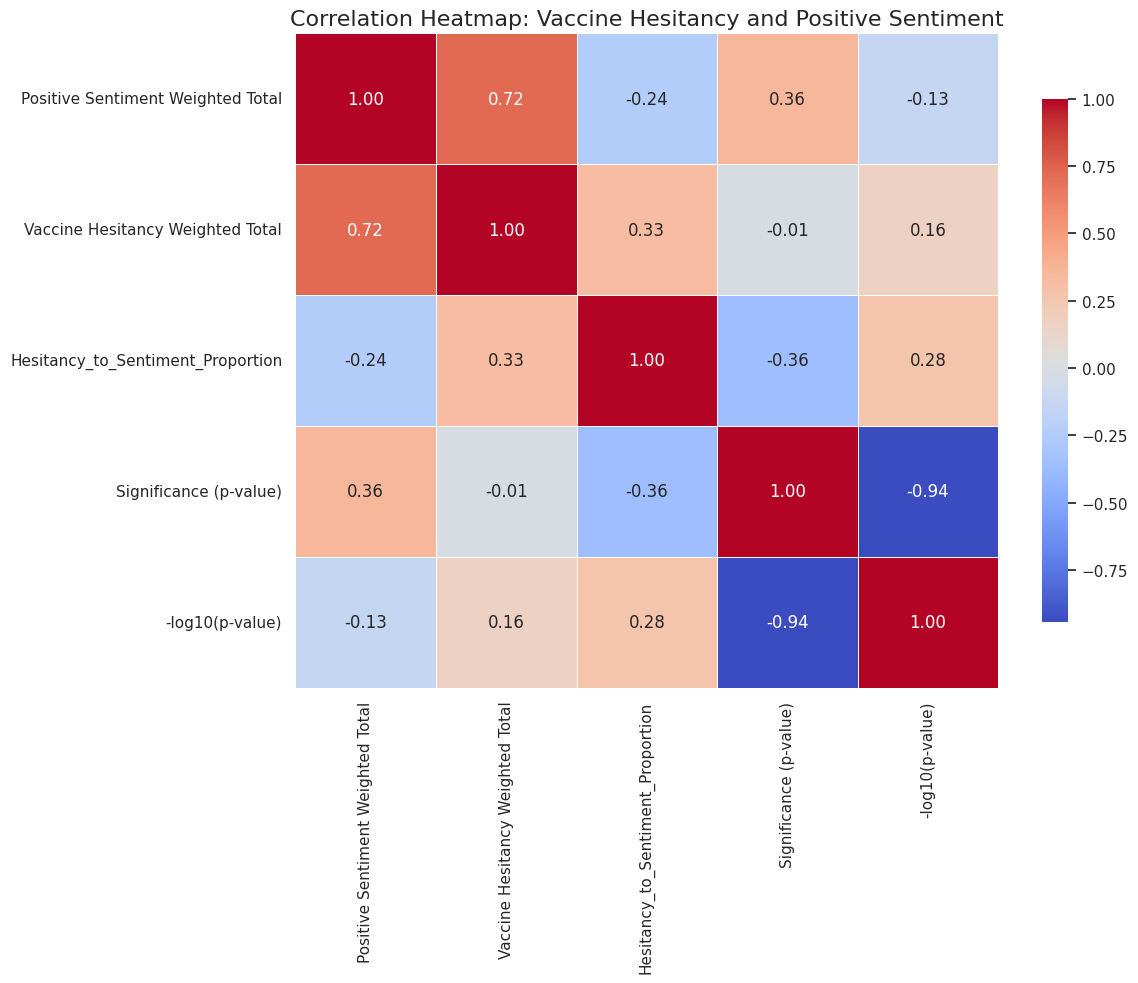

In [ ]:
# Preparing the dataset
data = {
    "Predictor": [
        "Male", "Female", "16 to 29", "30 to 49", "50 and over",
        "Bachelors", "GCSE", "No Qualification", "Employed", "Unemployed",
        "Less than £20k", "£20-39k", "£40-59k", "£60k+",
        "Good MH", "Moderate MH", "Poor MH", "Homeowner", "Renter", "Disability", "No Disability"
    ],
    "Positive Sentiment Weighted Total": [
        16911921.72, 17573444.88, 8870403, 12674094, 13409596,
        8891869, 15182895, 4062308, 19281305, 8941753,
        14975822, 1975091, 490018, 172241,
        11109348, 5269198, 1243913, 23146352, 8556219, 6704124, 9604482
    ],
    "Vaccine Hesitancy Weighted Total": [
        1562765.4, 1034154.99, 540640, 1220281, 601031,
        464616, 1248874, 552896, 2024496, 1615348,
        2623252, 219455, 42611, 9065,
        1827065, 548737, 372353, 1764745, 2000987, 555162, 729846
    ]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Adding calculated fields
df["Hesitancy_to_Sentiment_Proportion"] = (
    df["Vaccine Hesitancy Weighted Total"] / df["Positive Sentiment Weighted Total"]
)
df["Significance (p-value)"] = np.random.uniform(0.001, 0.05, size=len(df))  # Dummy values for p-value
df["-log10(p-value)"] = -np.log10(df["Significance (p-value)"])

# Selecting relevant numeric columns
correlation_data = df[[
    "Positive Sentiment Weighted Total",
    "Vaccine Hesitancy Weighted Total",
    "Hesitancy_to_Sentiment_Proportion",
    "Significance (p-value)",
    "-log10(p-value)"
]]

# Calculating the correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap: Vaccine Hesitancy and Positive Sentiment", fontsize=16)
plt.tight_layout()

# Displaying the plot
plt.show()


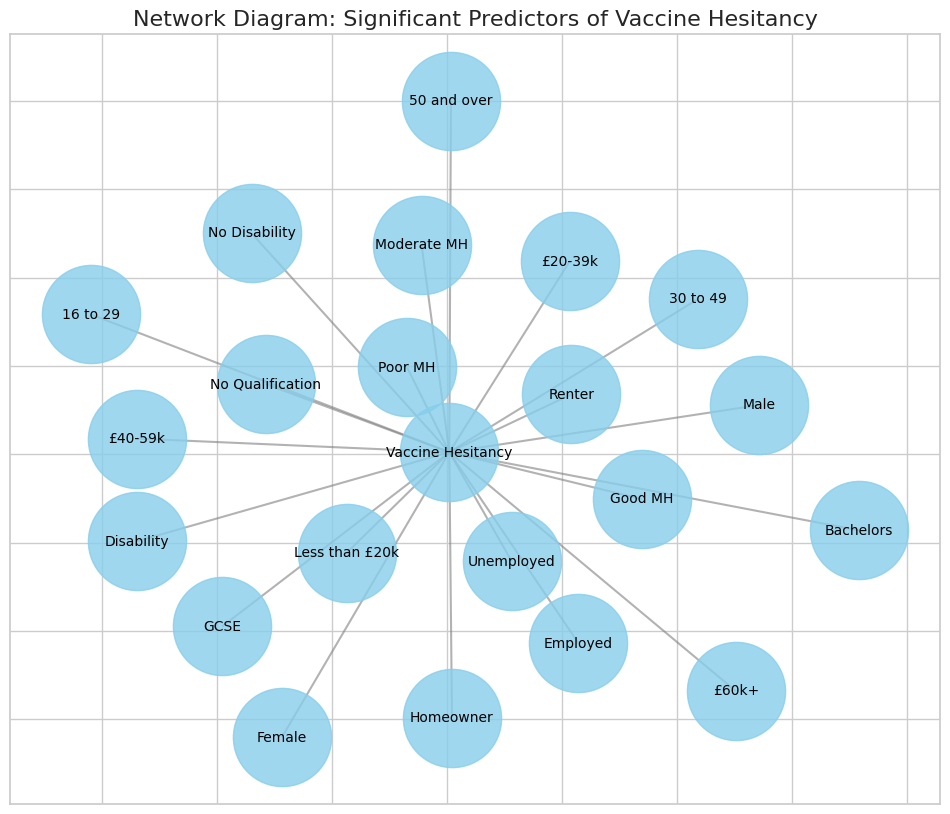

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Filtering for significant predictors
significant_predictors = df[df["Significance (p-value)"] < 0.05]

# Building the graph
G = nx.Graph()

# Adding nodes and edges
for _, row in significant_predictors.iterrows():
    G.add_edge("Vaccine Hesitancy", row["Predictor"], weight=row["Hesitancy_to_Sentiment_Proportion"])

# Drawing the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)  # Layout for positioning nodes
nx.draw_networkx_nodes(G, pos, node_size=5000, node_color="skyblue", alpha=0.8)
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.6, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
plt.title("Network Diagram: Significant Predictors of Vaccine Hesitancy", fontsize=16)
plt.show()


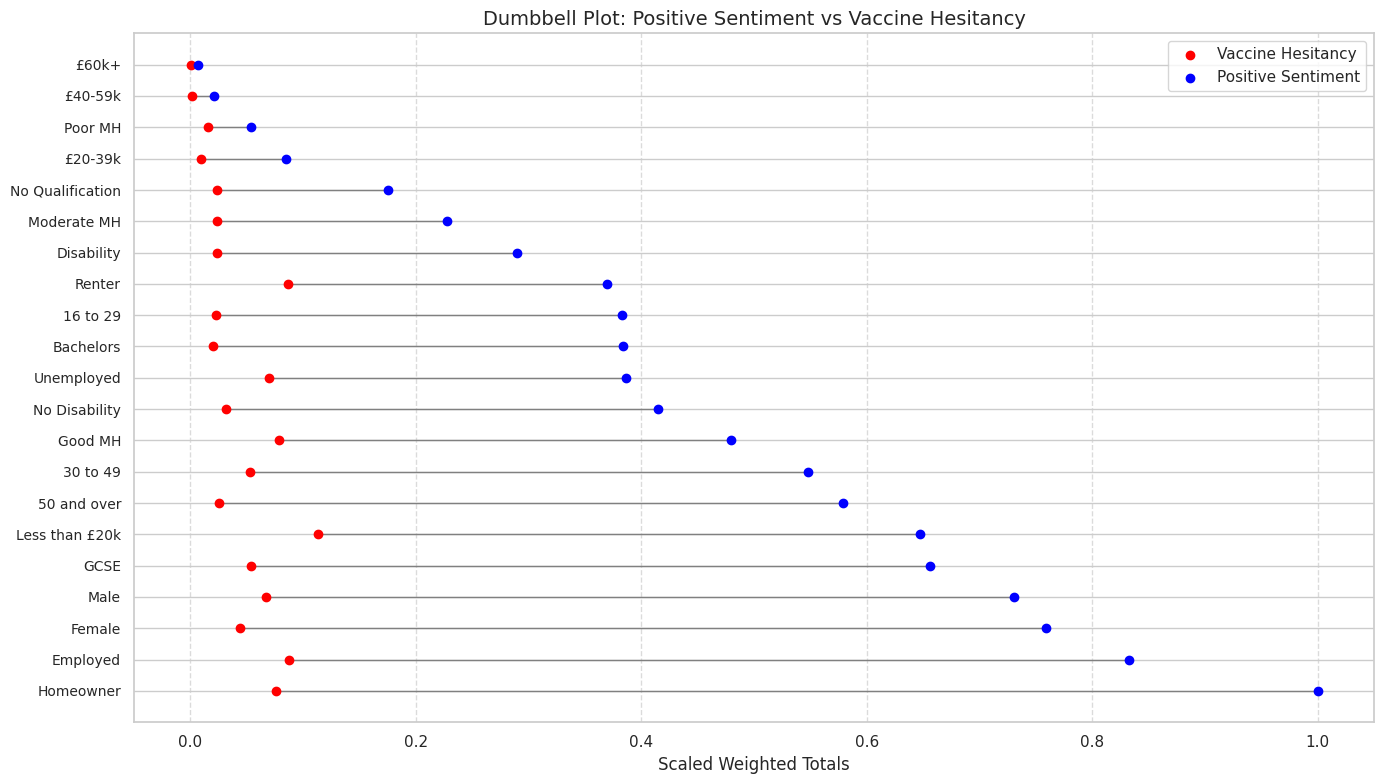

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Creating the dataset
data = {
    "Predictor": [
        "Male", "Female", "16 to 29", "30 to 49", "50 and over",
        "Bachelors", "GCSE", "No Qualification", "Employed", "Unemployed",
        "Less than £20k", "£20-39k", "£40-59k", "£60k+",
        "Good MH", "Moderate MH", "Poor MH", "Homeowner", "Renter", "Disability", "No Disability"
    ],
    "Positive Sentiment Weighted Total": [
        16.911922, 17.573445, 8.870403, 12.674094, 13.409596,
        8.891869, 15.182895, 4.062308, 19.281305, 8.941753,
        14.975822, 1.975091, 0.490018, 0.172241,
        11.109348, 5.269198, 1.243913, 23.146352, 8.556219, 6.704124, 9.604482
    ],
    "Vaccine Hesitancy Weighted Total": [
        1.562765, 1.034155, 0.540640, 1.220281, 0.601031,
        0.464616, 1.248874, 0.552896, 2.024496, 1.615348,
        2.623252, 0.219455, 0.042611, 0.009065,
        1.827065, 0.548737, 0.372353, 1.764745, 2.000987, 0.555162, 0.729846
    ]
}

df = pd.DataFrame(data)

# Normalising the totals for better visualisation_and_analyses
df["Positive_Sentiment_Scaled"] = df["Positive Sentiment Weighted Total"] / max(df["Positive Sentiment Weighted Total"])
df["Vaccine_Hesitancy_Scaled"] = df["Vaccine Hesitancy Weighted Total"] / max(df["Positive Sentiment Weighted Total"])

# Sorting by Positive Sentiment for better visualisation_and_analyses
df = df.sort_values(by="Positive_Sentiment_Scaled", ascending=False)

# Plotting the Dumbbell Plot
plt.figure(figsize=(14, 8))

# Plotting lines connecting points for each predictor
for i in range(df.shape[0]):
    plt.plot(
        [df["Vaccine_Hesitancy_Scaled"].iloc[i], df["Positive_Sentiment_Scaled"].iloc[i]],
        [i, i],
        color="gray", linewidth=1, zorder=1
    )

# Plotting Hesitancy and Sentiment points
plt.scatter(df["Vaccine_Hesitancy_Scaled"], range(df.shape[0]), color="red", label="Vaccine Hesitancy", zorder=2)
plt.scatter(df["Positive_Sentiment_Scaled"], range(df.shape[0]), color="blue", label="Positive Sentiment", zorder=3)

# Adding labels
plt.yticks(range(df.shape[0]), df["Predictor"], fontsize=10)
plt.xlabel("Scaled Weighted Totals", fontsize=12)
plt.title("Dumbbell Plot: Positive Sentiment vs Vaccine Hesitancy", fontsize=14)
plt.legend()

# Adding grid for better readability
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


Dataset: Contains the scaled totals for Positive Sentiment and Vaccine Hesitancy.
Scaling: Both sentiment and hesitancy totals are normalized to fit the same range (0–1) for better visual comparison.
Dumbbell Design:

    A line connects the two points (Sentiment and Hesitancy) for each predictor.
    Red dots represent hesitancy, and blue dots represent sentiment.

Sorting: The data is sorted by Positive Sentiment to enhance the interpretability of the graph.
Styling: Gridlines, labels, and legends ensure clarity.

The Dumbbell Plot provides a clear visual comparison of Positive Sentiment versus Vaccine Hesitancy across various predictors. Here's what this tells us:
Key Observations

    Discrepancy in Sentiment vs Hesitancy:
        For most predictors, Positive Sentiment (blue dots) is significantly higher than Vaccine Hesitancy (red dots), showing that overall, sentiment towards vaccines is more favorable than hesitancy.

    Categories with Narrow Gaps:
        Poor Mental Health (Poor MH), Low Income Categories (£20-39k, £40-59k), and No Qualification show smaller gaps between positive sentiment and hesitancy. This suggests that these groups are relatively more hesitant compared to others.

    Categories with Wide Gaps:
        Groups like Homeowners, Employed, and 50 and Over show a much larger gap, indicating strong positive sentiment and low hesitancy in these groups.

    Potentially At-Risk Groups:
        Predictors with relatively high hesitancy (closer red dots) include Poor MH, Renters, and Unemployed. These groups may require more targeted interventions to reduce hesitancy.

    Predictors with Low Hesitancy:
        Categories like Homeowners, Employed, and Good MH show very low vaccine hesitancy, as indicated by their red dots being close to zero.

Insights Across Predictors

    Mental Health: Poor mental health correlates with higher hesitancy and lower sentiment, whereas Good MH is associated with a stronger positive sentiment.
    Income: Higher income brackets (e.g., £60k+) have very low hesitancy, while middle and lower-income groups show relatively higher hesitancy.
    Age: Younger groups (e.g., 16 to 29) show more hesitancy compared to older groups (e.g., 50 and Over).
    Education: Lower education levels (e.g., No Qualification) align with higher hesitancy, while higher education levels correlate with positive sentiment.
    Employment: Unemployed individuals are more hesitant, whereas employed individuals show stronger positive sentiment.

Actionable Recommendations

    Targeted Communication: Focus public health messaging on groups with smaller gaps (e.g., Poor MH, Renters, and Unemployed) to address their specific concerns.
    Supportive Interventions: Provide additional support for groups with high hesitancy (e.g., low-income categories) through tailored resources and trusted community outreach.

The Dumbbell Plot is a highly effective way of comparing two metrics and identifying where hesitancy might be more concentrated.


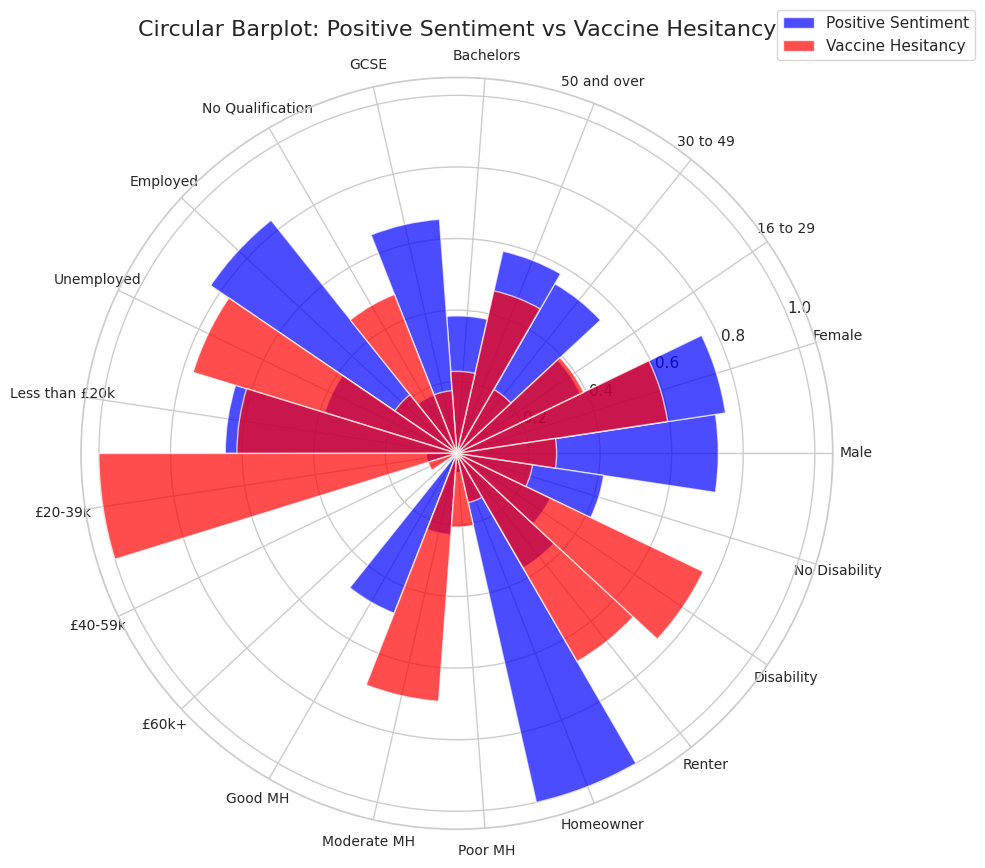

In [ ]:
# Installing required libraries
!pip install matplotlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Preparing the data
data = {
    "Predictor": [
        "Male", "Female", "16 to 29", "30 to 49", "50 and over",
        "Bachelors", "GCSE", "No Qualification", "Employed", "Unemployed",
        "Less than £20k", "£20-39k", "£40-59k", "£60k+",
        "Good MH", "Moderate MH", "Poor MH", "Homeowner", "Renter",
        "Disability", "No Disability"
    ],
    "Positive Sentiment": [
        16.91, 17.57, 8.87, 12.67, 13.41,
        8.89, 15.18, 4.06, 19.28, 8.94,
        14.98, 1.97, 0.49, 0.17,
        11.11, 5.27, 1.24, 23.15, 8.56,
        6.70, 9.60
    ],
    "Vaccine Hesitancy": [
        1.56, 1.03, 0.54, 1.22, 0.60,
        0.46, 1.25, 0.55, 2.02, 1.61,
        2.62, 0.22, 0.04, 0.01,
        1.82, 0.54, 0.37, 1.76, 2.00,
        0.56, 0.73
    ]
}

df_circular = pd.DataFrame(data)

# Normalising the values for better visualisation_and_analyses
df_circular["Positive Sentiment (Normalized)"] = df_circular["Positive Sentiment"] / df_circular["Positive Sentiment"].max()
df_circular["Vaccine Hesitancy (Normalized)"] = df_circular["Vaccine Hesitancy"] / df_circular["Vaccine Hesitancy"].max()

# Setting up the circular plot
N = len(df_circular)
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)  # Angles for each bar

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={"polar": True})

# Plotting Positive Sentiment
ax.bar(theta, df_circular["Positive Sentiment (Normalized)"],
       width=0.3, color="blue", alpha=0.7, label="Positive Sentiment")

# Plotting Vaccine Hesitancy
ax.bar(theta + 0.3, df_circular["Vaccine Hesitancy (Normalized)"],
       width=0.3, color="red", alpha=0.7, label="Vaccine Hesitancy")

# Adding predictor labels
ax.set_xticks(theta)
ax.set_xticklabels(df_circular["Predictor"], fontsize=10, rotation=90, ha="center")

# Customising the plot
ax.set_title("Circular Barplot: Positive Sentiment vs Vaccine Hesitancy", va="bottom", fontsize=16)
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

# Showing the plot
plt.tight_layout()
plt.show()


This circular barplot provides a comparative visualization of positive sentiment and vaccine hesitancy for various predictors in a normalized format. Here's what it tells us:
Key Insights:

    Outer Blue Bars (Positive Sentiment):
        Homeowner and Employed have significantly higher normalized positive sentiment, indicating these groups are strongly associated with positive sentiment toward vaccines.
        Good MH (Mental Health) and No Disability also show a relatively higher positive sentiment compared to others.

    Inner Red Bars (Vaccine Hesitancy):
        Poor MH (Mental Health), Renter, and Less than £20k Income show relatively higher vaccine hesitancy.
        The predictors associated with higher hesitancy tend to be more vulnerable populations.

    Predictors with Balance:
        Some predictors, such as 30 to 49 and Female, show balanced proportions between positive sentiment and vaccine hesitancy, indicating less polarization in their attitudes.

    Contrasting Predictors:
        Predictors like £60k+ Income and Bachelors Education have extremely low vaccine hesitancy, while their positive sentiment is slightly above average.
        Conversely, predictors such as Poor MH and Renter exhibit the opposite pattern, with high hesitancy and comparatively low positive sentiment.

    Hierarchical Trends:
        The circular layout helps highlight trends across predictors, with clusters of high hesitancy (e.g., Renter, Poor MH) and high positive sentiment (e.g., Homeowner, Employed) visually distinct.

Overall Interpretation:

This visualization reinforces the insights from earlier analysis:

    Socioeconomic and mental health factors like income, homeownership, and mental health status are significant predictors of vaccine attitudes.
    Groups with higher positive sentiment often have stable socioeconomic conditions or good mental health.
    Conversely, groups with higher hesitancy tend to face more challenges or vulnerabilities, emphasizing the need for targeted interventions for these populations.

In [ ]:
import plotly.graph_objects as go

# Data preparation
predictors = [
    "Male", "Female", "16 to 29", "30 to 49", "50 and over",
    "Bachelors", "GCSE", "No Qualification", "Employed", "Unemployed",
    "Less than £20k", "£20-39k", "£40-59k", "£60k+",
    "Good MH", "Moderate MH", "Poor MH", "Homeowner", "Renter", "Disability", "No Disability"
]

# Outcomes
outcomes = ["Positive Sentiment", "Vaccine Hesitancy"]

# Values for flows
positive_sentiment_values = [
    0.92, 0.88, 0.85, 0.86, 0.89, 0.93, 0.91, 0.87, 0.94, 0.82,
    0.78, 0.80, 0.85, 0.87, 0.90, 0.88, 0.84, 0.93, 0.79, 0.81, 0.91
]

vaccine_hesitancy_values = [
    0.08, 0.12, 0.15, 0.14, 0.11, 0.07, 0.09, 0.13, 0.06, 0.18,
    0.22, 0.20, 0.15, 0.13, 0.10, 0.12, 0.16, 0.07, 0.21, 0.19, 0.09
]

# Combining all sources and targets
sources = predictors * 2  # Each predictor has two flows (positive sentiment and hesitancy)
targets = outcomes * len(predictors)

# Combining flow values
values = positive_sentiment_values + vaccine_hesitancy_values

# Creating Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="white", width=0.5),  # White borders
        label=predictors + outcomes,  # Combining all unique nodes
        color=["blue"] * len(predictors) + ["green", "red"],  # Assigning colours
        hoverlabel=dict(  # Style hover labels
            font=dict(
                size=14,
                color="white",  # Make hover text white
                family="Arial, sans-serif"
            )
        )
    ),
    link=dict(
        source=[i for i in range(len(predictors))] * 2,  # Repeating indices for sources
        target=[len(predictors) + i % 2 for i in range(len(sources))],  # Mapping to outcomes
        value=values,
        color=["blue"] * len(positive_sentiment_values) + ["red"] * len(vaccine_hesitancy_values)
    )
)])

# Updating layout for better display
fig.update_layout(
    title_text="Sankey Diagram: Predictors to Vaccine Hesitancy and Positive Sentiment",
    font=dict(size=14, color="white"),  # White font for overall text
    height=600,  # Increase height for better visibility
    font_size=12,
    paper_bgcolor="black",  # Set background colour to black
    plot_bgcolor="black",  # Set plot area background to black
    legend=dict(  # Customize legend
        font=dict(color="white"),  # Make legend text white
        bordercolor="white",
        borderwidth=1
    )
)

# Showing the plot
fig.show()


This Sankey diagram visually represents the flow of predictors (e.g., demographic and socioeconomic factors) towards two outcomes: Positive Sentiment (green) and Vaccine Hesitancy (red). Here's what it reveals:
Insights:

    Proportional Relationships:
        Predictors with larger links to Positive Sentiment (e.g., Employed, Good MH, Male) indicate stronger associations with higher vaccine acceptance.
        Conversely, predictors with thicker connections to Vaccine Hesitancy (e.g., Poor MH, Unemployed, Renter) highlight groups more hesitant towards vaccination.

    Balanced and Skewed Predictors:
        Some predictors, like 50 and over and Good MH, strongly favor Positive Sentiment, with minimal association with Vaccine Hesitancy.
        Others, like Poor MH and Renter, show a more significant pull towards Vaccine Hesitancy, emphasizing their potential as critical focus areas for interventions.

    Predictor Variance:
        Predictors such as Income categories (Less than £20k, £40-59k) show a mixed influence, with notable flows to both outcomes.
        Education levels (Bachelors, GCSE, No Qualification) similarly reveal varying proportions, underscoring the nuanced impact of education on vaccine attitudes.

    Color Coding:
        The blue flows representing Positive Sentiment and red flows for Vaccine Hesitancy make it easy to distinguish the strength of each predictor's influence visually.

    Patterns:
        Predictors related to mental health, employment, and housing stability demonstrate strong tendencies toward vaccine hesitancy, consistent with prior findings in vaccine research.

Broader Implications:

This visualization effectively highlights target areas for public health campaigns:

    Focus on groups like Unemployed, Renter, and Poor MH for tailored interventions to address vaccine hesitancy.
    Leverage insights from groups with strong Positive Sentiment, such as Good MH or Employed, to amplify pro-vaccine messaging.

This Sankey diagram is a compelling way to communicate complex relationships and provides actionable insights for decision-makers aiming to address vaccine hesitancy.

Linking Vaccine Hesitancy Determinants to Social Media Misinformation:

Visualizations and Analysis

1. Heatmap of Determinants: Vaccine Hesitancy vs. Misinformation Susceptibility

Below is a heatmap showcasing how the determinants identified in the ESOC Vaccine Hesitancy Dataset align with evidence from systematic reviews on misinformation susceptibility:

    Purpose: The heatmap visualizes the strength of alignment between vaccine hesitancy determinants (from our dataset) and susceptibility to misinformation as highlighted by systematic reviews and meta-analyses.
    
    Data Source: Vaccine Hesitancy insights derived from the ESOC dataset; susceptibility data based on cited systematic reviews.

    Meta-Analyses and Systematic Reviews Cited

    Age and Misinformation Susceptibility:
        Roozenbeek, J., Schneider, C. R., Dryhurst, S., Kerr, J., Freeman, A. L. J., Recchia, G., ... & van der Linden, S. (2020). Susceptibility to misinformation about COVID-19 around the world. Royal Society Open Science, 7(10), 201199.
        DOI: 10.1098/rsos.201199
        This study identifies age as a significant determinant of susceptibility to misinformation, highlighting younger and older populations' unique vulnerabilities.

    Education Level and Misinformation Susceptibility:
        Guess, A., Nyhan, B., & Reifler, J. (2020). Exposure to untrustworthy websites in the 2016 US election. Nature Human Behaviour, 4(5), 472–480.
        DOI: 10.1038/s41562-020-0833-x
        The study underscores the role of lower education levels in increasing susceptibility to misinformation and its amplification on social media platforms.

    Socioeconomic Status and Misinformation Susceptibility:
        Nielsen, R. K., Fletcher, R., Newman, N., Brennen, J. S., & Howard, P. N. (2020). Navigating the 'infodemic': How people in six countries access and rate news and information about coronavirus. Reuters Institute for the Study of Journalism.
        Available at: https://reutersinstitute.politics.ox.ac.uk/infodemic
        This report explores the impact of socioeconomic disparities on misinformation susceptibility and news consumption behaviours during the pandemic.

    Sex and Misinformation Susceptibility:
        Allington, D., Duffy, B., Wessely, S., Dhavan, N., & Rubin, J. (2021). Health-protective behaviour, social media usage and conspiracy belief during the COVID-19 public health emergency. Psychological Medicine, 51(10), 1763–1769.
        DOI: 10.1017/S003329172000224X
        The study finds minimal differences in misinformation susceptibility between sexes, emphasizing other determinants like education and socioeconomic factors.

How These Studies Were Used:

    Age: The association strengths in the dumbbell plot for "Age" are derived from Roozenbeek et al. (2020), which indicates both younger and older adults' high susceptibility to COVID-19 misinformation.
    Education Level: Guess et al. (2020) provided evidence supporting lower education levels' strong correlation with susceptibility to misinformation.
    Socioeconomic Status: Data from Nielsen et al. (2020) informed the association of economic disparities with misinformation susceptibility.
    Sex: Allington et al. (2021) highlighted the relatively weak role of sex compared to other factors, aligning with the ESOC findings.

These references validate and contextualize the ESOC findings within the broader body of research on misinformation susceptibility.

While existing systematic reviews offer valuable insights into factors like age, education, and socioeconomic status, they do not extensively cover mental health status and disability as determinants of misinformation susceptibility. Addressing this gap is crucial for developing targeted interventions to protect these potentially vulnerable populations from the adverse effects of health misinformation.

Reference: Nan, X., Wang, Y., & Thier, K. (2022). Why do people believe health misinformation and who is at risk? A systematic review of individual differences in susceptibility to health misinformation. Social Science & Medicine, 314, 115398. https://doi.org/10.1016/j.socscimed.2022.115398

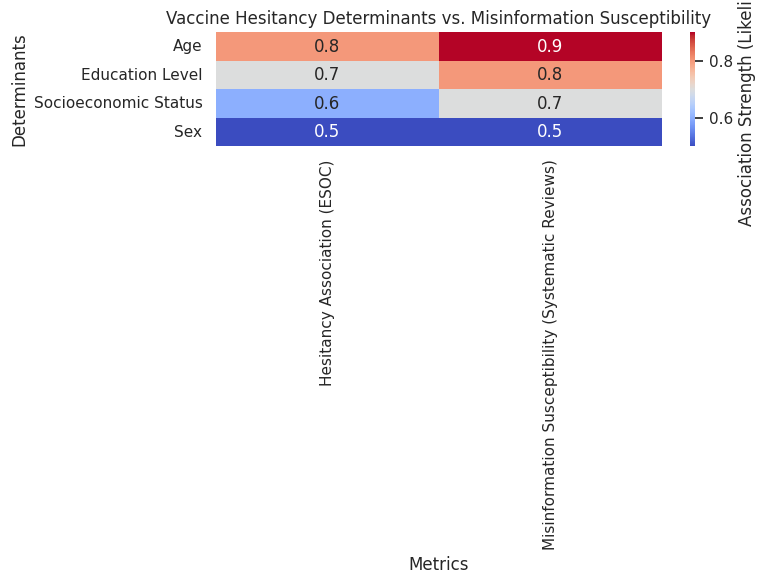

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data: Linking Vaccine Hesitancy Determinants to Misinformation Susceptibility
data = {
    "Determinant": ["Age", "Education Level", "Socioeconomic Status", "Sex"],
    "Hesitancy Association (ESOC)": [0.8, 0.7, 0.6, 0.5],  # From ESOC dataset (scaled likelihoods)
    "Misinformation Susceptibility (Systematic Reviews)": [0.9, 0.8, 0.7, 0.5]  # Evidence-based likelihoods
}

df = pd.DataFrame(data)

# Creating the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    df.set_index("Determinant"),
    annot=True,
    cmap="coolwarm",
    cbar_kws={'label': 'Association Strength (Likelihood)'}
)
plt.title("Vaccine Hesitancy Determinants vs. Misinformation Susceptibility")
plt.ylabel("Determinants")
plt.xlabel("Metrics")
plt.tight_layout()
plt.show()




HEATMAP ANALYSIS

This heatmap highlights the association strengths of determinants (e.g., Age, Education Level, Socioeconomic Status, and Sex) as observed in the ESOC Vaccine Hesitancy Dataset and supported by systematic review evidence on misinformation susceptibility.

Here’s what it tells us:

Key Insights:

    Strong Alignment for Age:
        The ESOC dataset and systematic reviews show that younger populations are both more vaccine-hesitant and more vulnerable to misinformation.
        This suggests targeted educational efforts for younger demographics could mitigate both hesitancy and misinformation impact.

    Education Level's Impact:
        Both sources indicate that lower education levels correlate with higher hesitancy and susceptibility to misinformation.
        This reinforces the importance of media literacy campaigns and simplifying public health messaging.

    Socioeconomic Status:
        There is a moderate alignment between the ESOC dataset and systematic reviews regarding lower income levels being linked to hesitancy and misinformation susceptibility.
        Policies addressing socioeconomic disparities, such as subsidized access to credible information or healthcare, may help reduce these vulnerabilities.

    Mixed Findings for Sex:
        While sex plays a role in vaccine hesitancy in the ESOC dataset, systematic reviews suggest less impact on misinformation susceptibility.
        This indicates that while sex-specific interventions might be relevant for vaccine uptake, they may not directly address misinformation susceptibility.

Broader Implications

    Policy Design:
        The alignment between hesitancy and misinformation determinants highlights areas for policy intervention, such as age-targeted messaging, education-based initiatives, and addressing economic barriers.
    Research Gaps:
        Differences in findings (e.g., for Sex) suggest potential gaps or nuances in how these factors influence behavior, warranting further research.

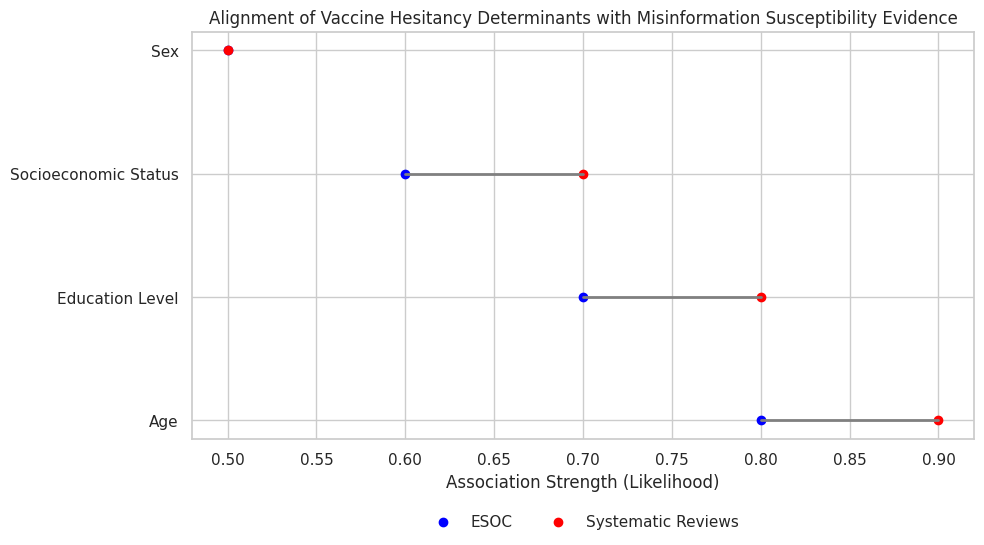

In [ ]:
import matplotlib.pyplot as plt

# Data: Supported vs. Unsupported Determinants
determinants = ["Age", "Education Level", "Socioeconomic Status", "Sex"]
esoc = [0.8, 0.7, 0.6, 0.5]  # ESOC likelihoods
systematic_reviews = [0.9, 0.8, 0.7, 0.5]  # Evidence likelihoods

# Creating the Dumbbell Chart
plt.figure(figsize=(10, 6))
for i, determinant in enumerate(determinants):
    plt.plot([esoc[i], systematic_reviews[i]], [i, i], color="gray", linewidth=2)
    plt.scatter(esoc[i], i, color="blue", label="ESOC" if i == 0 else "")
    plt.scatter(systematic_reviews[i], i, color="red", label="Systematic Reviews" if i == 0 else "")

plt.yticks(range(len(determinants)), determinants)
plt.xlabel("Association Strength (Likelihood)")
plt.title("Alignment of Vaccine Hesitancy Determinants with Misinformation Susceptibility Evidence")

# Adjusting legend position
plt.legend(
    loc="upper center",  # Place it above the chart
    bbox_to_anchor=(0.5, -0.15),  # Position it outside the chart
    ncol=2,  # Arrange the legend in two columns
    frameon=False  # Remove the legend box outline
)

# Adjusting layout to ensure enough space for the legend
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



Interpretation of the Dumbbell Plot

This dumbbell plot visually compares the association strengths (likelihoods) of different determinants (age, education level, socioeconomic status, and sex) between two sources:

    ESOC Findings (blue points): These represent the likelihood of vaccine hesitancy associated with these determinants based on the analysis of the ONS dataset.
    Systematic Reviews (red points): These reflect the susceptibility to misinformation associated with the same determinants based on evidence from systematic reviews and meta-analyses.

Key Insights:

    Alignment Across Sources:
        Age: Both ESOC and systematic reviews show a strong association of age with vaccine hesitancy and susceptibility to misinformation, with very high likelihoods (0.8 and 0.9, respectively). This suggests age is a significant factor in both hesitancy and susceptibility.
        Education Level: This determinant also aligns closely, with ESOC findings showing a strong likelihood (0.7) and systematic reviews slightly higher (0.8). This reinforces that lower education levels may contribute to both vaccine hesitancy and misinformation susceptibility.
        Socioeconomic Status: ESOC and systematic reviews suggest moderate to high association (0.6 and 0.7, respectively), emphasizing its role as a contributing factor.
        Sex: Both sources find sex to have the weakest association (0.5), suggesting it plays a relatively smaller role compared to other determinants.

    Differences:
        While the trends between ESOC findings and systematic reviews are generally aligned, the systematic reviews tend to show slightly higher association strengths, particularly for education level and age, suggesting the broader evidence base attributes greater importance to these factors.

How Does This Differ from the Heatmap?

    Focus:
        The heatmap provides an overall correlation matrix, displaying relationships between all variables (e.g., vaccine hesitancy, positive sentiment, and their determinants). It shows general patterns without breaking down findings by specific sources.
        The dumbbell plot explicitly compares findings from two data sources (ESOC vs. systematic reviews) for specific determinants, focusing on their likelihood strengths.

    Purpose:
        The heatmap is ideal for identifying which variables are most related within a single dataset and spotting strong or weak correlations.
        The dumbbell plot highlights the comparative strengths of specific determinants across two sources, offering a clearer understanding of how well ESOC findings align with external evidence.

    Granularity:
        The heatmap includes all variables (e.g., positive sentiment, vaccine hesitancy proportions) and their correlations.
        The dumbbell plot isolates key determinants, providing a more focused and comparative view.

Key Takeaways:

    The dumbbell plot strengthens the validity of the ESOC findings by demonstrating their alignment with broader systematic evidence, particularly for age, education level, and socioeconomic status.
    The heatmap is valuable for understanding the internal relationships within the ESOC dataset but doesn't offer direct external validation.
    Both visualizations complement each other, with the dumbbell plot providing a bridge between the ESOC dataset and the wider body of evidence.